In [48]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import sys
import seaborn as sns
import matplotlib.pyplot as plt

### Create dataframes for ty18, ty19, ty20 & ty21

In [49]:
# create dataframe from cbp18cd.csv for us ty18
us_18 = pd.read_csv('cbp18cd.csv', thousands =',')
us_19 = pd.read_csv('cbp19cd.csv', thousands = ',')
us_20 = pd.read_csv('cbp20cd.csv', thousands = ',')
us_21 = pd.read_csv('cbp21cd.csv', thousands = ',')

### Data cleaning: Remove un-necessary columns and rows from dataframes.

In [50]:
# drop columns & rows which are not useful.
df_us18 = ((us_18.drop(['State FIPS', '2017 NAICS Code', 'Employment Noise Flag',' 1st Quarter Payroll ($1,000) ', 
                          '1st Quarter Payroll Noise Flag','Annual Payroll Noise Flag'], axis = 1)
                          .drop(us_18.loc[us_18['NAICS Description'] == 'Total for all sectors'].index, axis=0)
                          .dropna(axis=0)))

In [51]:
us_20.columns

Index(['State FIPS', 'State', '116th Congressional District',
       '2017 NAICS Code', 'NAICS Description', ' Number of Establishments ',
       ' Employment ', 'Employment Noise Flag',
       ' 1st Quarter Payroll ($1,000) ', '1st Quarter Payroll Noise Flag',
       ' Annual Payroll ($1,000) ', 'Annual Payroll Noise Flag'],
      dtype='object')

In [52]:

df_us19 = ((us_19.drop(['State FIPS', '2017 NAICS Code', 'Employment Noise Flag',' 1st Quarter Payroll ($1,000) ', 
                          '1st Quarter Payroll Noise Flag','Annual Payroll Noise Flag'], axis = 1)
                          .drop(us_19.loc[us_19['NAICS Description'] == 'Total for all sectors'].index, axis=0)
                          .dropna(axis=0)))

In [53]:
df_us20 = ((us_20.drop(['State FIPS', '2017 NAICS Code', 'Employment Noise Flag',' 1st Quarter Payroll ($1,000) ', 
                          '1st Quarter Payroll Noise Flag','Annual Payroll Noise Flag'], axis = 1)
                          .drop(us_20.loc[us_20['NAICS Description'] == 'Total for all sectors'].index, axis=0)
                          .dropna(axis=0)))

In [54]:
df_us21 = ((us_21.drop(['State FIPS', '2017 NAICS Code', 'Employment Noise Flag',' 1st Quarter Payroll ($1,000) ', 
                          '1st Quarter Payroll Noise Flag','Annual Payroll Noise Flag'], axis = 1)
                          .drop(us_21.loc[us_21['NAICS Description'] == 'Total for all sectors'].index, axis=0)
                          .dropna(axis=0)))

In [55]:
df_us20['NAICS Description'].unique()

array(['Agriculture, forestry, fishing and hunting',
       'Mining, quarrying, and oil and gas extraction', 'Utilities',
       'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing', 'Information',
       'Finance and insurance', 'Real estate and rental and leasing',
       'Professional, scientific, and technical',
       'Management of companies and enterprises',
       'Administrative and support and waste', 'Educational services',
       'Health care and social assistance',
       'Arts, entertainment, and recreation',
       'Accommodation and food services',
       'Other services (except public administration)',
       'Industries not classified'], dtype=object)

### add average salary column by multiplying annual payroll ($1000) to 1000 & dividing it to number of employment.

In [56]:
df_us19 = df_us19.astype({' Annual Payroll ($1,000) ': 'float', ' Employment ': 'int'})
df_us19

State  116th Congressional District  \
1         Alabama                           1.0   
2         Alabama                           1.0   
3         Alabama                           1.0   
4         Alabama                           1.0   
5         Alabama                           1.0   
...           ...                           ...   
9092  Puerto Rico                           0.0   
9093  Puerto Rico                           0.0   
9094  Puerto Rico                           0.0   
9095  Puerto Rico                           0.0   
9096  Puerto Rico                           0.0   

                                  NAICS Description  \
1        Agriculture, forestry, fishing and hunting   
2     Mining, quarrying, and oil and gas extraction   
3                                         Utilities   
4                                      Construction   
5                                     Manufacturing   
...                                             ...   
9092              Health care and social assistance   
9093            Arts, entertainment, and recreation   
9094                Accommodation and food services   
9095  Other services (except public administration)   
9096                      Industries not classified   

       Number of Establishments    Employment    Annual Payroll ($1,000)   
1                          145.0          1045                    43359.0  
2                           36.0           536                    43988.0  
3                           53.0          1617                   152837.0  
4                         1379.0         17772                   887780.0  
5                          582.0         27752                  1933666.0  
...                          ...           ...                        ...  
9092                      7582.0         83642                  2225795.0  
9093                       464.0          3868                    87271.0  
9094                      4991.0         78980                  1185596.0  
9095                      3275.0         17392                   344144.0  
9096                       398.0           544                    20685.0  

[8660 rows x 6 columns]

In [57]:
df_us18['AverageSalary'] = (df_us18[' Annual Payroll ($1,000) '] * 1000 / df_us18[' Employment ']).round()
df_us19['AverageSalary'] = (df_us19[' Annual Payroll ($1,000) '] * 1000 / df_us19[' Employment ']).round()
df_us20['AverageSalary'] = (df_us20[' Annual Payroll ($1,000) '] * 1000 / df_us20[' Employment ']).round()
df_us21['AverageSalary'] = (df_us21[' Annual Payroll ($1,000) '] * 1000 / df_us21[' Employment ']).round()

In [58]:
df_us18.drop([' Annual Payroll ($1,000) '], axis=1, inplace = True)
df_us19.drop([' Annual Payroll ($1,000) '], axis=1, inplace = True)
df_us20.drop([' Annual Payroll ($1,000) '], axis=1, inplace = True)
df_us21.drop([' Annual Payroll ($1,000) '], axis=1, inplace = True)


### cleaning columns name & add year reference.

In [59]:
df_us20.columns

Index(['State', '116th Congressional District', 'NAICS Description',
       ' Number of Establishments ', ' Employment ', 'AverageSalary'],
      dtype='object')

In [60]:
# cleaning columns name & refer to year
col_lis18 = list(df_us18.columns)
col_lis19 = list(df_us19.columns)
col_lis20 = list(df_us20.columns)
col_lis21 = list(df_us21.columns)
for i in range(6):
    if i <= 2:
        col_lis18[i] = col_lis18[i].replace(' ','')
        col_lis19[i] = col_lis19[i].replace(' ','')
        col_lis20[i] = col_lis20[i].replace(' ','')
        col_lis21[i] = col_lis21[i].replace(' ','')    
    else:
        i >= 3
        col_lis18[i] = col_lis18[i].replace(' ','') + '_18'
        col_lis19[i] = col_lis19[i].replace(' ','') + '_19'
        col_lis20[i] = col_lis20[i].replace(' ','') + '_20'
        col_lis21[i] = col_lis21[i].replace(' ','') + '_21'

df_us18.columns = col_lis18
df_us19.columns = col_lis19
df_us20.columns = col_lis20
df_us21.columns = col_lis21
df_us18

State  116thCongressionalDistrict  \
1         Alabama                         1.0   
2         Alabama                         1.0   
3         Alabama                         1.0   
4         Alabama                         1.0   
5         Alabama                         1.0   
...           ...                         ...   
9099  Puerto Rico                         0.0   
9100  Puerto Rico                         0.0   
9101  Puerto Rico                         0.0   
9102  Puerto Rico                         0.0   
9103  Puerto Rico                         0.0   

                                   NAICSDescription  \
1        Agriculture, forestry, fishing and hunting   
2     Mining, quarrying, and oil and gas extraction   
3                                         Utilities   
4                                      Construction   
5                                     Manufacturing   
...                                             ...   
9099              Health care and social assistance   
9100            Arts, entertainment, and recreation   
9101                Accommodation and food services   
9102  Other services (except public administration)   
9103                      Industries not classified   

      NumberofEstablishments_18  Employment_18  AverageSalary_18  
1                         142.0         1127.0           39800.0  
2                          34.0          500.0           83570.0  
3                          56.0         1618.0           93771.0  
4                        1367.0        16277.0           52559.0  
5                         568.0        27761.0           68348.0  
...                         ...            ...               ...  
9099                     7440.0        78776.0           26528.0  
9100                      438.0         3521.0           21028.0  
9101                     4661.0        74476.0           14889.0  
9102                     3218.0        17387.0           20075.0  
9103                      318.0          361.0           61188.0  

[8667 rows x 6 columns]

### create California subset from US data set for ty18,19,20,21

In [61]:
cali18 = df_us18.loc[df_us18['State'] == 'California'].reset_index(drop=True)
cali19 = df_us19.loc[df_us19['State'] == 'California'].reset_index(drop=True)
cali20 = df_us20.loc[df_us20['State'] == 'California'].reset_index(drop=True)
cali21 = df_us21.loc[df_us21['State'] == 'California'].reset_index(drop=True)

In [62]:
# change column name 116th congressional ditricts. Every time congressional districts boarders change but we consider it remain the same for
# consecutive four years. For ty21 it is 118th congressional districts
# cali21.rename(columns = {'118th Congressional District':'116th Congressional District'}, inplace = True)

### Data cleaning of NAICS Description column values

In [63]:
cali18.columns

Index(['State', '116thCongressionalDistrict', 'NAICSDescription',
       'NumberofEstablishments_18', 'Employment_18', 'AverageSalary_18'],
      dtype='object')

In [64]:
cali18['NAICSDescription'].replace('Professional, scientific, and technical', 'Professional, scientific, and technical services', inplace = True)
cali19['NAICSDescription'].replace('Professional, scientific, and technical', 'Professional, scientific, and technical services', inplace = True)
cali20['NAICSDescription'].replace('Professional, scientific, and technical', 'Professional, scientific, and technical services', inplace = True)

In [65]:
cali18['NAICSDescription'].replace('Administrative and support and waste','Administrative and support and waste management' , inplace = True)
cali19['NAICSDescription'].replace('Administrative and support and waste','Administrative and support and waste management' , inplace = True)
cali20['NAICSDescription'].replace('Administrative and support and waste','Administrative and support and waste management' , inplace = True)

#### Analysis did for 3 years ty18, ty19, ty20 as congressional districts were the same(53).Didn't include ty21 in analysis as one congressional
#### district is adjusted to 52. It may differ the congressional districts boarder & other numbers too.

##### create merged dataset for three years.

In [66]:
dfs = [df.set_index(['State','116thCongressionalDistrict', 'NAICSDescription']) for df in [cali18, cali19, cali20]]# cali21]]

df4 = pd.concat(dfs, axis=1).reset_index()
df4.rename(columns = {'116thCongressionalDistrict': 'CongressionalDistrict116th'}, inplace= True)



#### Finding null values in dataframe to verify merged dataset

In [67]:
#For ty21 one congressional district adjusted & total congressional district would be 52 where as for ty18, ty19, ty20 congressional districts
# were 53. So there is more null values for ty21.
df4.isnull().sum()

State                         0
CongressionalDistrict116th    0
NAICSDescription              0
NumberofEstablishments_18     1
Employment_18                 1
AverageSalary_18              1
NumberofEstablishments_19     2
Employment_19                 2
AverageSalary_19              2
NumberofEstablishments_20     3
Employment_20                 3
AverageSalary_20              3
dtype: int64

In [68]:
print(len(cali18))
print(len(cali19))
print(len(cali20))
#print(len(cali21))
print(' ')
print(len(df4))


1049
1048
1047
 
1050


In [69]:
#print(len(df4['NAICSDescription'].unique()))
#print(len(cali18['NAICSDescription'].unique()))
#print(len(cali19['NAICSDescription'].unique()))
#print(len(cali20['NAICSDescription'].unique()))
#print(len(cali21['NAICSDescription'].unique()))

#### Find null value position & replace it with appropriate value for better analysis.

In [70]:
idx, idy = np.where(pd.isnull(df4))
result = np.column_stack([df4.index[idx], df4.columns[idy]])
result = pd.DataFrame(result)
result = list(result[0].unique())
result

[428, 557, 657, 962]

#### For ty19 & ty20 there were no establishments for Mining, quarryaing, and oil and gas extraction in 22nd 116th congrassional district
#### For ty18 there were no establisments for Agriculture, forestry, fishing and hunting in 29th 116th congressional district
#### For ty19 & ty20 there were no establisments for Agriculture, forestry, fishing and hunting in 34th 116th congressional district.
#### For ty20 there were no establishments for Mining, quarryaing, and oil and gas extraction in 49th 116th congrassional district.

In [71]:
#df4
#for i in result:
#print(df4.loc[df4.index == 962])

In [72]:
#len(cali19.loc[cali19['116th Congressional District'] == 22]['NAICS Description'].unique())

In [73]:
df4 = (df4[['NAICSDescription','CongressionalDistrict116th','NumberofEstablishments_18','Employment_18','AverageSalary_18',
            'NumberofEstablishments_19','Employment_19','AverageSalary_19',
            'NumberofEstablishments_20','Employment_20','AverageSalary_20']].fillna(0))

In [74]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NAICSDescription            1050 non-null   object 
 1   CongressionalDistrict116th  1050 non-null   float64
 2   NumberofEstablishments_18   1050 non-null   float64
 3   Employment_18               1050 non-null   float64
 4   AverageSalary_18            1050 non-null   float64
 5   NumberofEstablishments_19   1050 non-null   float64
 6   Employment_19               1050 non-null   float64
 7   AverageSalary_19            1050 non-null   float64
 8   NumberofEstablishments_20   1050 non-null   float64
 9   Employment_20               1050 non-null   float64
 10  AverageSalary_20            1050 non-null   float64
dtypes: float64(10), object(1)
memory usage: 90.4+ KB


In [75]:
df4.isnull().sum()

NAICSDescription              0
CongressionalDistrict116th    0
NumberofEstablishments_18     0
Employment_18                 0
AverageSalary_18              0
NumberofEstablishments_19     0
Employment_19                 0
AverageSalary_19              0
NumberofEstablishments_20     0
Employment_20                 0
AverageSalary_20              0
dtype: int64

#### perform web scrapping to get 116th congressional districts names from wikipedia

In [76]:
url = r'https://en.wikipedia.org/wiki/California%27s_congressional_districts'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html.parser')

In [77]:
cong_dis = []
for i in soup.find_all('span', style = True):
    cong_dis.append(i.text.replace('(','').replace(')',''))
type(cong_dis)

list

In [78]:
x = cong_dis[2:55]
x
#x

['Oroville',
 'San Rafael',
 'Rocklin',
 'St. Helena',
 'Elk Grove',
 'Elk Grove',
 'Sacramento',
 'Walnut Grove',
 'Tracy',
 'Concord',
 'San Francisco',
 'Oakland',
 'Modesto',
 'Livermore',
 'South San Francisco',
 'Atherton',
 'Fremont',
 'San Jose',
 'Carmel Valley',
 'Fresno',
 'Hanford',
 'Big Bear Lake',
 'Santa Barbara',
 'Indio',
 'Westlake Village',
 'Santa Clarita',
 'Monterey Park',
 'Los Angeles',
 'Burbank',
 'Norwalk',
 'Los Angeles',
 'Redlands',
 'Los Angeles',
 'Pomona',
 'Torrance',
 'Los Angeles',
 'Whittier',
 'Riverside',
 'Anaheim Hills',
 'Corona',
 'Long Beach',
 'Los Angeles',
 'Los Angeles',
 'Seal Beach',
 'Santa Ana',
 'Irvine',
 'San Diego',
 'San Juan Capistrano',
 'San Diego',
 'San Diego',
 'San Diego',
 '[permanent dead link]',
 '[permanent dead link]']

#### California's 53rd congressional district was eliminated following the 2020 United States redistricting cycle.

In [79]:
df4['CongressionalDistrict116th'] = df4['CongressionalDistrict116th'].astype('int')
df4.head(3)

NAICSDescription  \
0                  Accommodation and food services   
1  Administrative and support and waste management   
2       Agriculture, forestry, fishing and hunting   

   CongressionalDistrict116th  NumberofEstablishments_18  Employment_18  \
0                           1                     1605.0        25050.0   
1                           1                      766.0         7993.0   
2                           1                      165.0         1448.0   

   AverageSalary_18  NumberofEstablishments_19  Employment_19  \
0           19168.0                     1595.0        25549.0   
1           36785.0                      782.0         8379.0   
2           60349.0                      156.0         1289.0   

   AverageSalary_19  NumberofEstablishments_20  Employment_20  \
0           21225.0                     1571.0        25043.0   
1           41128.0                      828.0         9305.0   
2           66009.0                      160.0         1599.0   

   AverageSalary_20  
0           18704.0  
1           39257.0  
2           62896.0

In [80]:
CongDis_lis = list(df4['CongressionalDistrict116th'])
#CongDis_lis

#### populate 116th congressional district names with congressional district number in dataframe

In [81]:
'''k = 0
p = []
for i in CongDis_lis:
    if i == 1:
        CongDis_lis[i] == x[i-1]
        p.append(CongDis_lis[i])
    elif CongDis_lis[i] == CongDis_lis[i-1]:
        i = x[i-1]
        p.append(i)
    else:
        k += 1
        CongDis_lis[i] == x[k]
        p.append(CongDis_lis[i])
#len(set(p))'''

'k = 0\np = []\nfor i in CongDis_lis:\n    if i == 1:\n        CongDis_lis[i] == x[i-1]\n        p.append(CongDis_lis[i])\n    elif CongDis_lis[i] == CongDis_lis[i-1]:\n        i = x[i-1]\n        p.append(i)\n    else:\n        k += 1\n        CongDis_lis[i] == x[k]\n        p.append(CongDis_lis[i])\n#len(set(p))'

In [82]:
k = 0
p = []

for i in range(len(CongDis_lis)):
    if i == 0:
        p.append((x[k] + str(k+1)))
    elif CongDis_lis[i] == CongDis_lis[i-1]:
        p.append((x[k]) + str(k+1))
    else:
        k += 1
        p.append(x[k] + str(k+1))
#print(p)
len(p)
df4['CongressionalDistrict116th'] = p

In [83]:
df4_total = df4.groupby('NAICSDescription').agg({'Employment_18': np.sum}).sort_values(ascending=False, by = 'Employment_18')

In [84]:
df4_total

Employment_18
NAICSDescription                                               
Health care and social assistance                     2041640.0
Accommodation and food services                       1780500.0
Retail trade                                          1694555.0
Professional, scientific, and technical services      1210303.0
Manufacturing                                         1163463.0
Administrative and support and waste management        904557.0
Wholesale trade                                        828650.0
Construction                                           805365.0
Information                                            673960.0
Finance and insurance                                  608886.0
Other services (except public administration)          597645.0
Transportation and warehousing                         554717.0
Educational services                                   426663.0
Management of companies and enterprises                360682.0
Arts, entertainment, and recreation                    350217.0
Real estate and rental and leasing                     308416.0
Utilities                                               57698.0
Agriculture, forestry, fishing and hunting              29002.0
Mining, quarrying, and oil and gas extraction           14051.0
Industries not classified                                2319.0

In [85]:
df4_total['perecntage_totalemployment'] = round((df4_total['Employment_18'] / df4_total['Employment_18'].sum()) * 100,2)
df4_total

Employment_18  \
NAICSDescription                                                  
Health care and social assistance                     2041640.0   
Accommodation and food services                       1780500.0   
Retail trade                                          1694555.0   
Professional, scientific, and technical services      1210303.0   
Manufacturing                                         1163463.0   
Administrative and support and waste management        904557.0   
Wholesale trade                                        828650.0   
Construction                                           805365.0   
Information                                            673960.0   
Finance and insurance                                  608886.0   
Other services (except public administration)          597645.0   
Transportation and warehousing                         554717.0   
Educational services                                   426663.0   
Management of companies and enterprises                360682.0   
Arts, entertainment, and recreation                    350217.0   
Real estate and rental and leasing                     308416.0   
Utilities                                               57698.0   
Agriculture, forestry, fishing and hunting              29002.0   
Mining, quarrying, and oil and gas extraction           14051.0   
Industries not classified                                2319.0   

                                                  perecntage_totalemployment  
NAICSDescription                                                              
Health care and social assistance                                      14.16  
Accommodation and food services                                        12.35  
Retail trade                                                           11.76  
Professional, scientific, and technical services                        8.40  
Manufacturing                                                           8.07  
Administrative and support and waste management                         6.28  
Wholesale trade                                                         5.75  
Construction                                                            5.59  
Information                                                             4.68  
Finance and insurance                                                   4.22  
Other services (except public administration)                           4.15  
Transportation and warehousing                                          3.85  
Educational services                                                    2.96  
Management of companies and enterprises                                 2.50  
Arts, entertainment, and recreation                                     2.43  
Real estate and rental and leasing                                      2.14  
Utilities                                                               0.40  
Agriculture, forestry, fishing and hunting                              0.20  
Mining, quarrying, and oil and gas extraction                           0.10  
Industries not classified                                               0.02

In [41]:
df4.nlargest?


Signature: df4.nlargest(n, columns, keep='first') -> 'DataFrame'
Docstring:
Return the first `n` rows ordered by `columns` in descending order.

Return the first `n` rows with the largest values in `columns`, in
descending order. The columns that are not specified are returned as
well, but not used for ordering.

This method is equivalent to
``df.sort_values(columns, ascending=False).head(n)``, but more
performant.

Parameters
----------
n : int
    Number of rows to return.
columns : label or list of labels
    Column label(s) to order by.
keep : {'first', 'last', 'all'}, default 'first'
    Where there are duplicate values:

    - `first` : prioritize the first occurrence(s)
    - `last` : prioritize the last occurrence(s)
    - ``all`` : do not drop any duplicates, even it means
                selecting more than `n` items.

    .. versionadded:: 0.24.0

Returns
-------
DataFrame
    The first `n` rows ordered by the given columns in descending
    order.

See Also
--------
DataFra

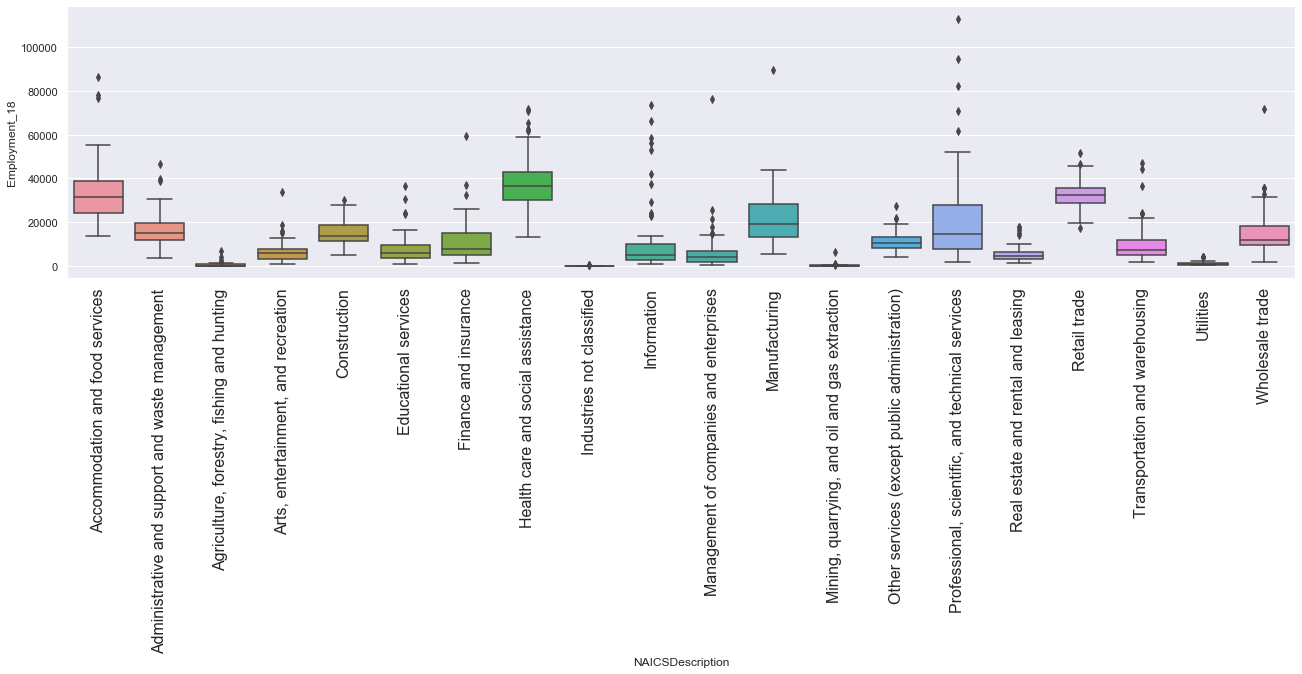

In [37]:
sns.set(rc={'figure.figsize':(22, 5)})
z = sns.boxplot(data = df4, x = 'NAICSDescription',y = 'Employment_18')
#p = [0,5000, 10000, 25000, 50000,75000, 100000]
#x.set_yscale(p)
#x.set_yscale('log')
#ticks = p
#x.set_yticks(p)
z.set_xticklabels(labels = df4['NAICSDescription'].unique(), rotation = 90,fontsize = 16);
#z.set(yscale = 'log');

In [59]:
df4.query('NumberofEstablishments_18' + '==' + str(165.0))

NAICSDescription CongressionalDistrict116th  \
2  Agriculture, forestry, fishing and hunting                  Oroville1   

   NumberofEstablishments_18  Employment_18  AverageSalary_18  \
2                      165.0         1448.0           60349.0   

   NumberofEstablishments_19  Employment_19  AverageSalary_19  \
2                      156.0         1289.0           66009.0   

   NumberofEstablishments_20  Employment_20  AverageSalary_20  
2                      160.0         1599.0           62896.0

In [60]:
#df4.loc[df4['NAICSDescription'] == 'Industries not classified']

#### Visualization of employment per year per NAICS Description & per congressional district

c:\Users\shree\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


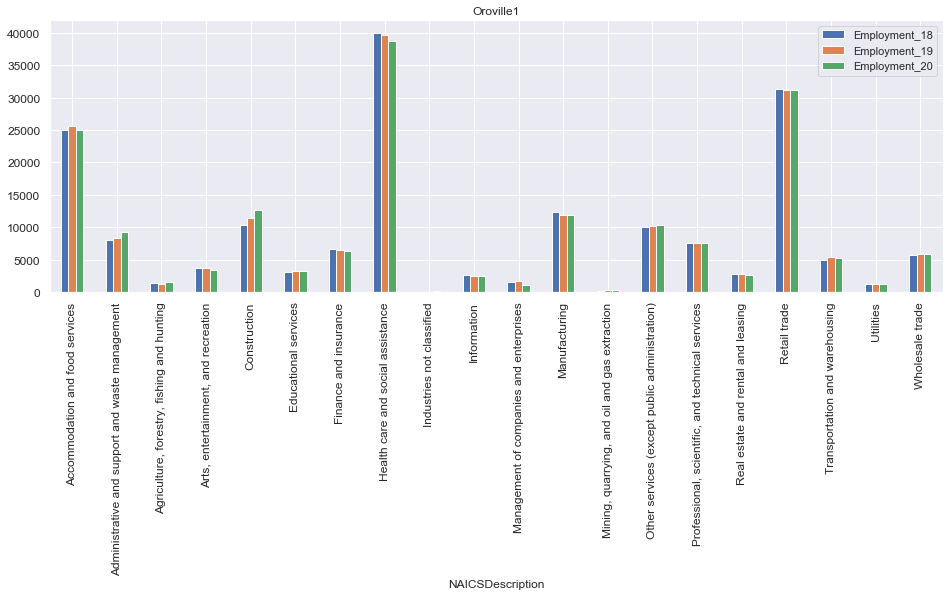

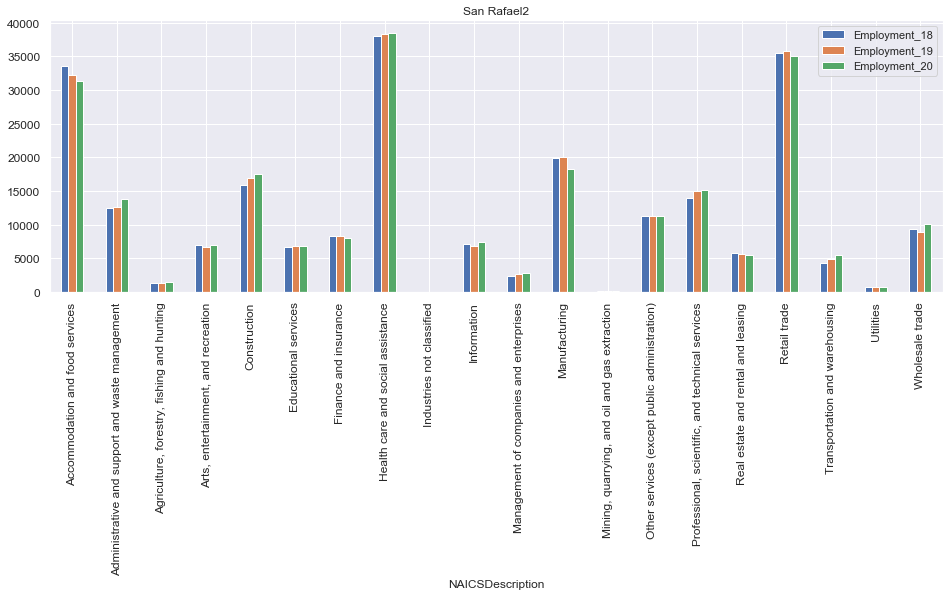

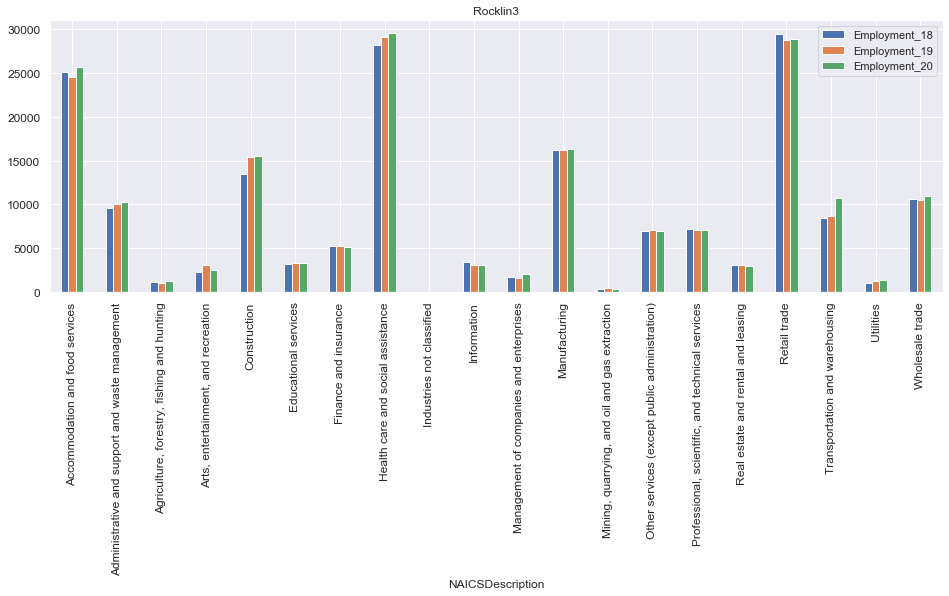

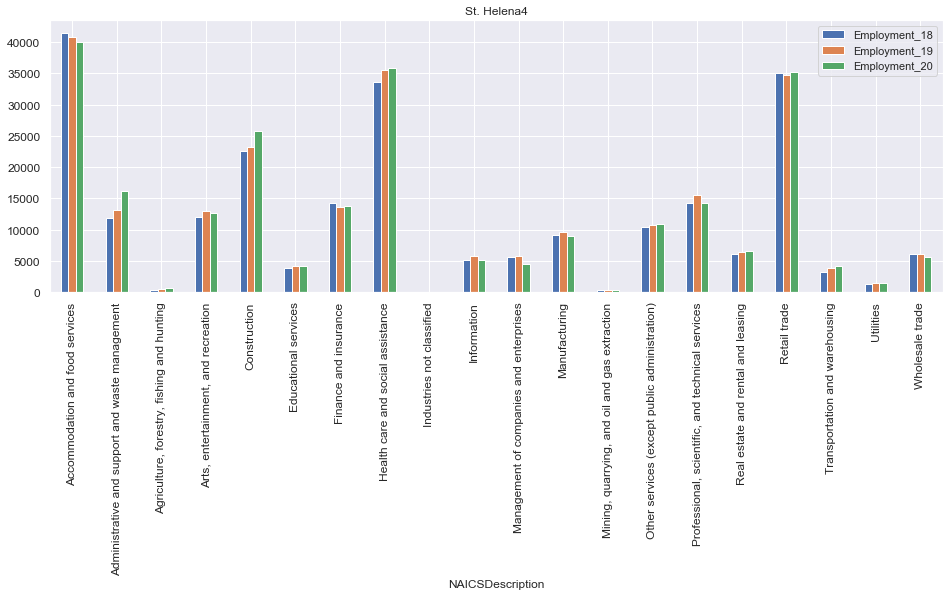

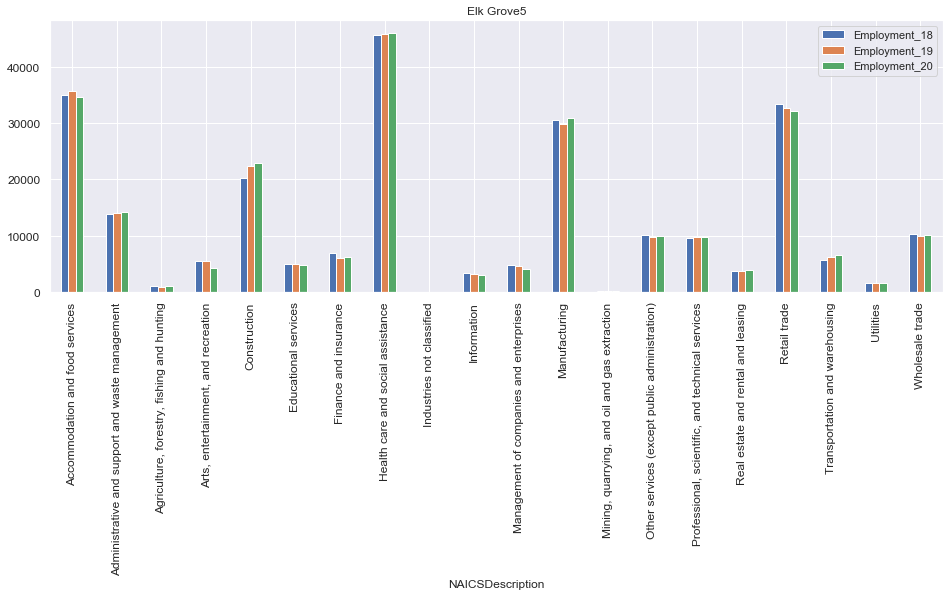

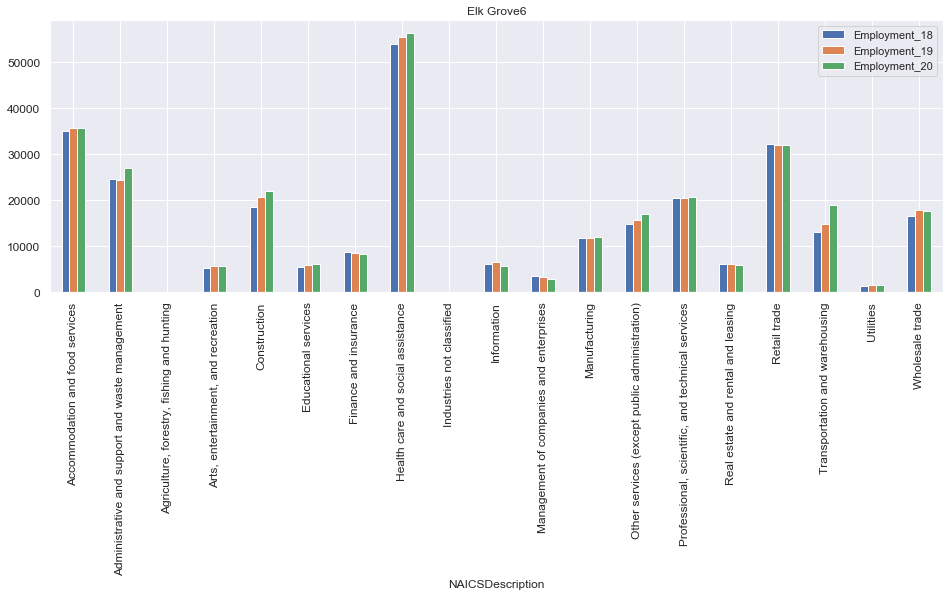

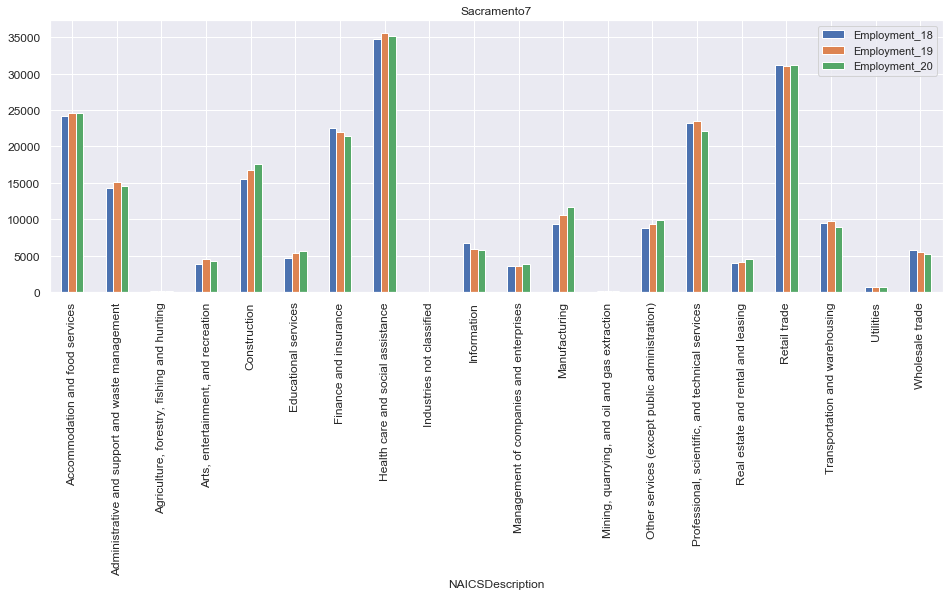

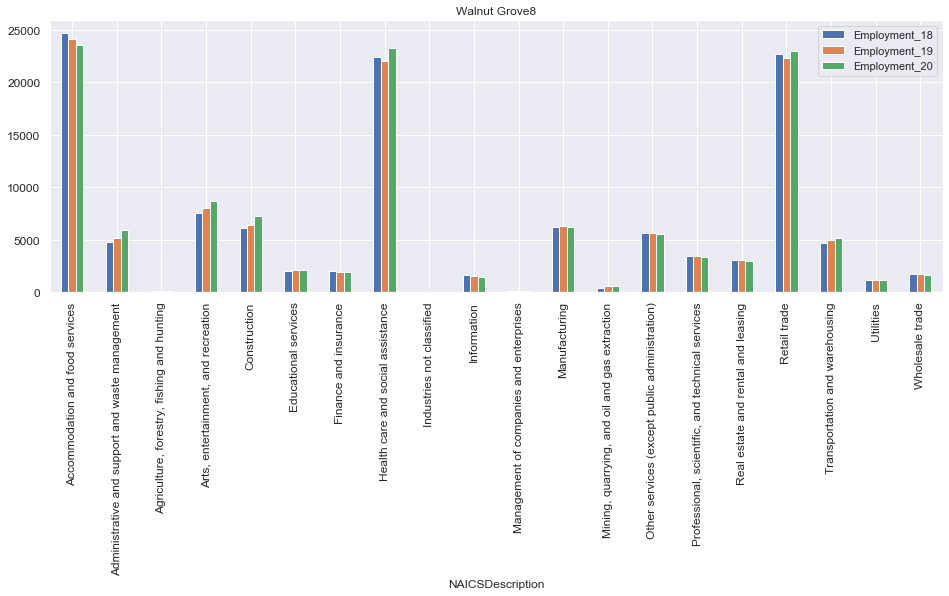

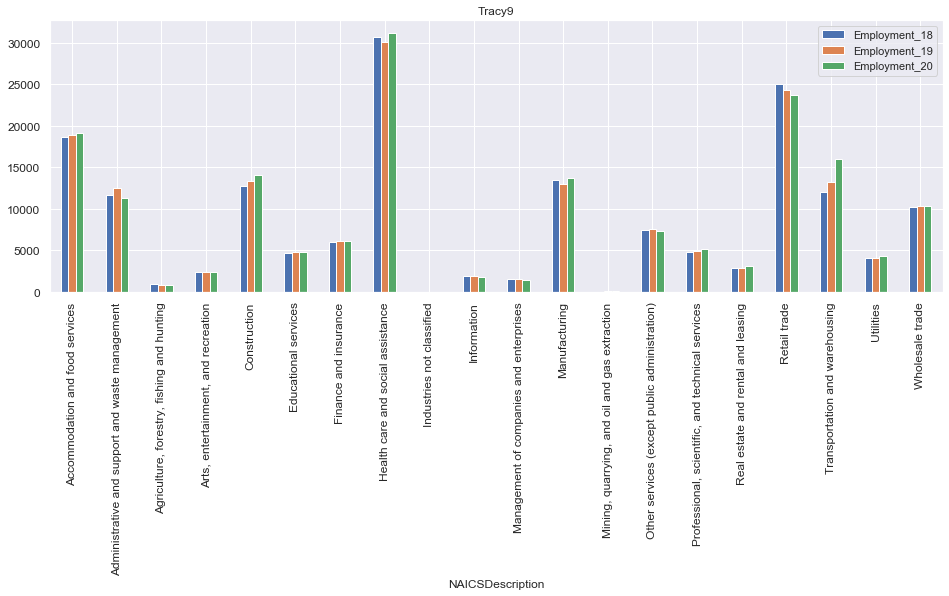

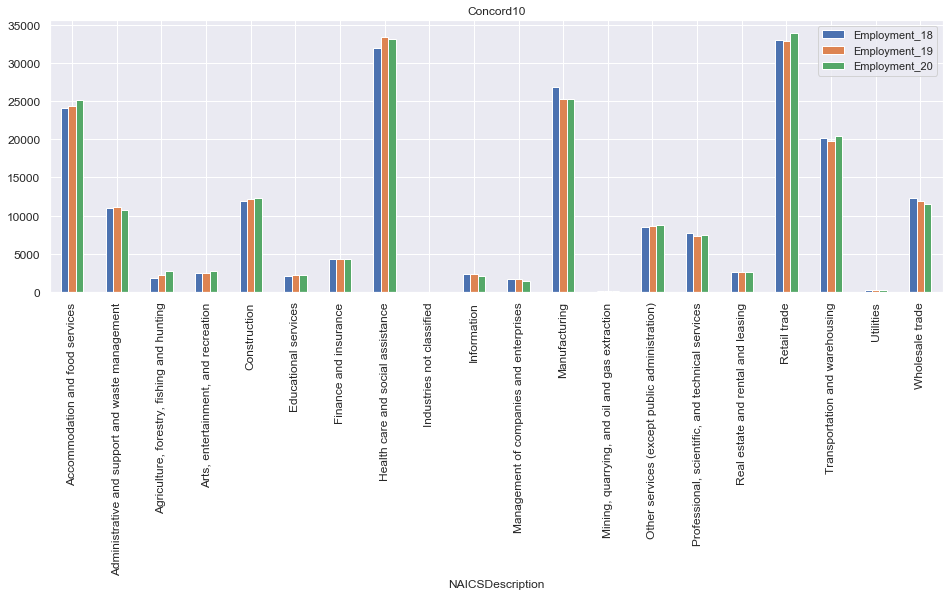

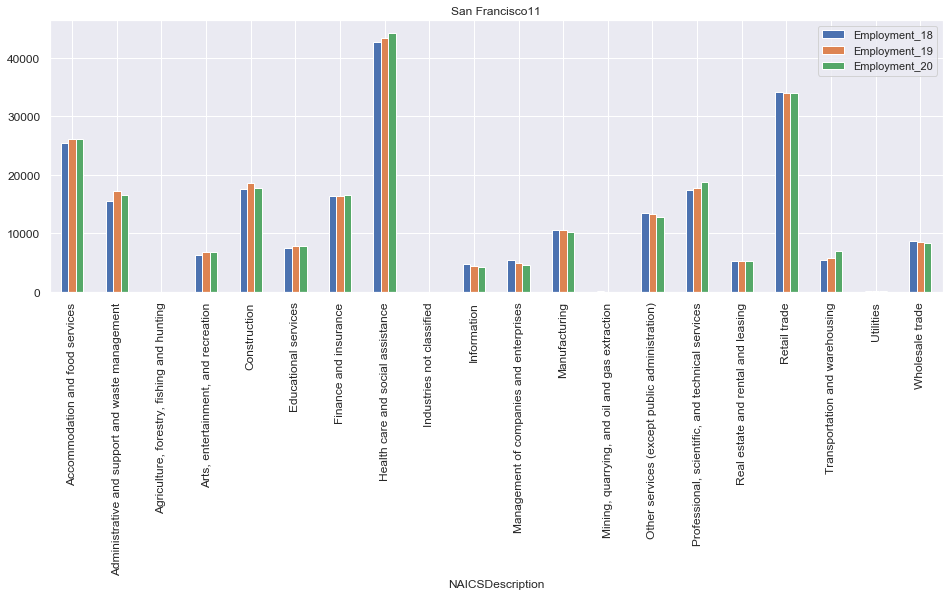

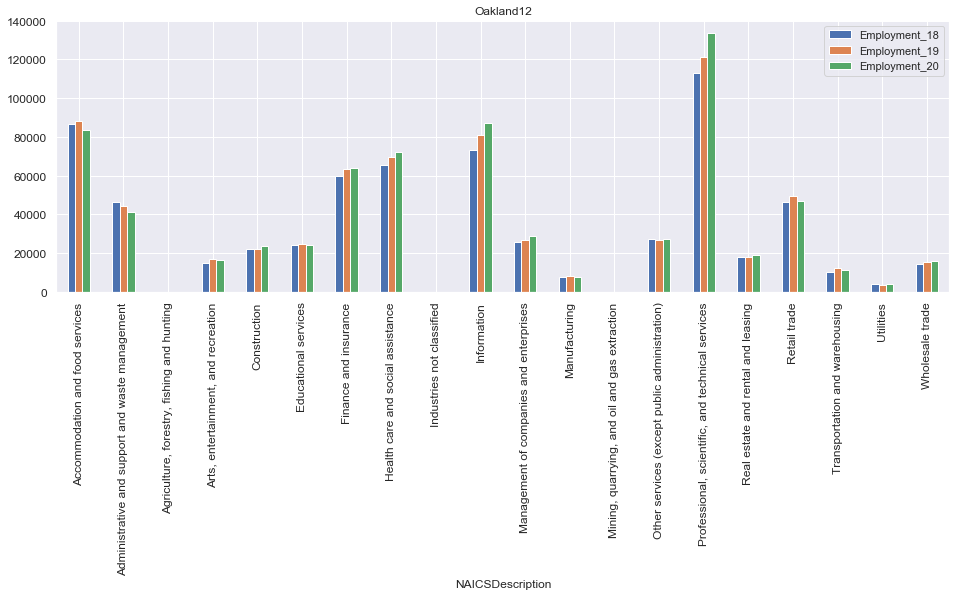

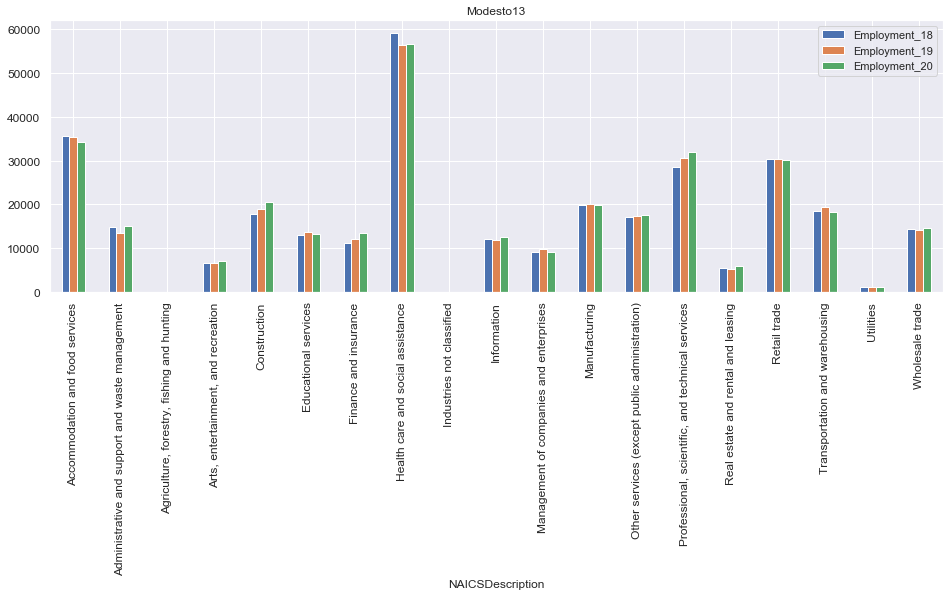

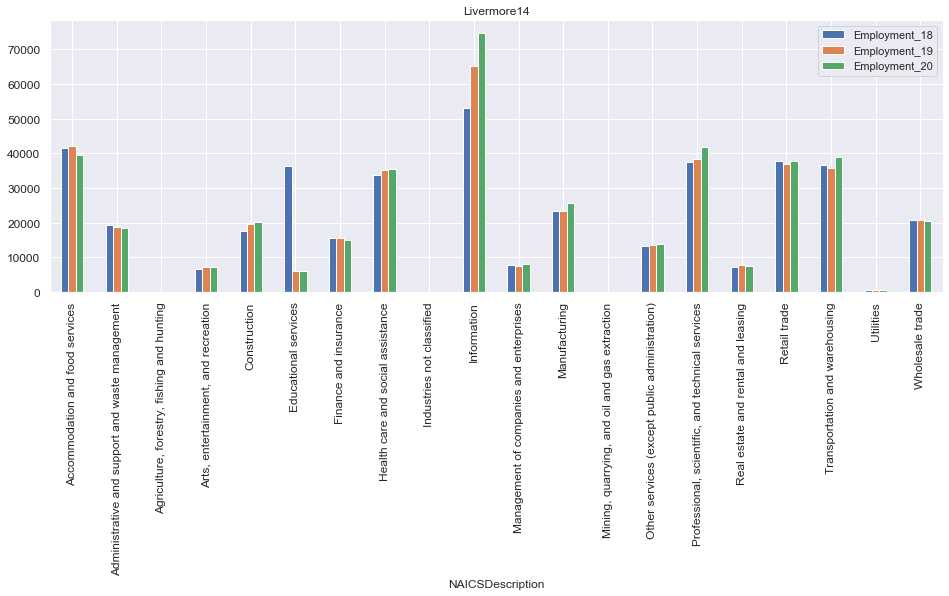

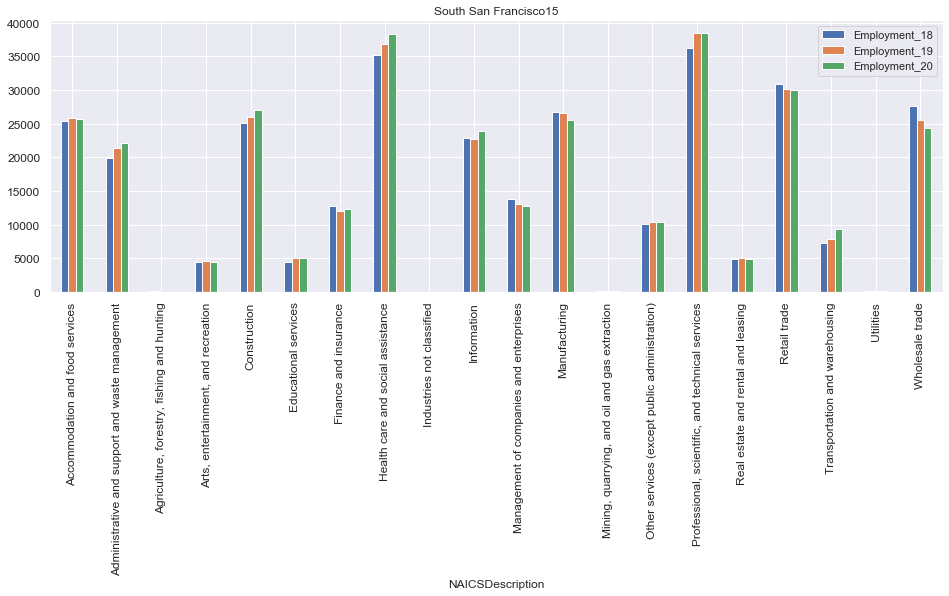

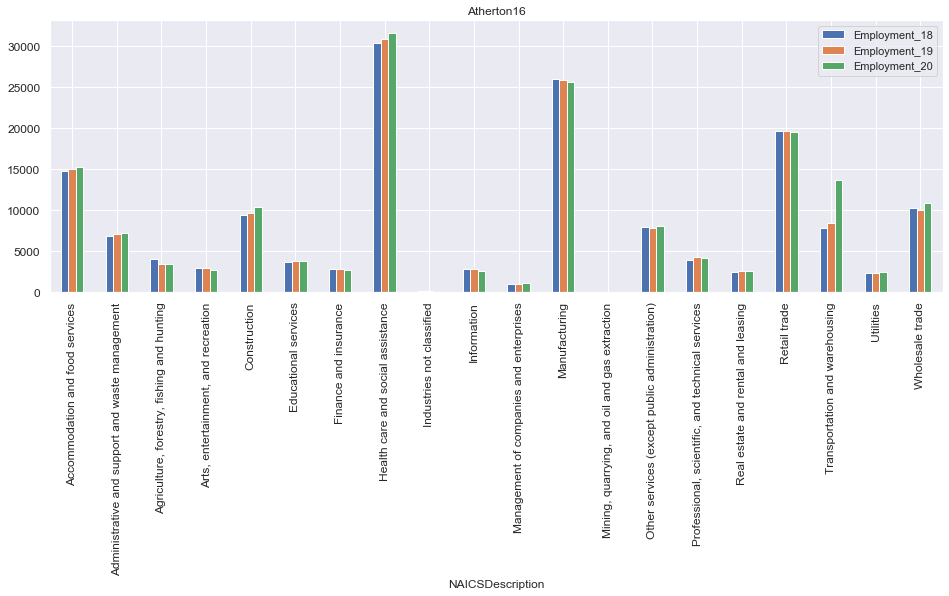

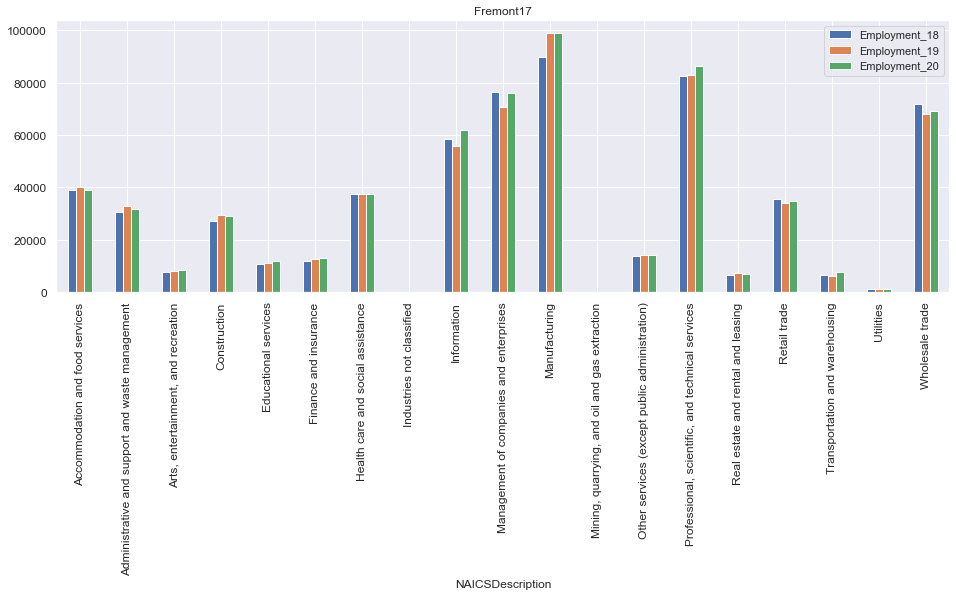

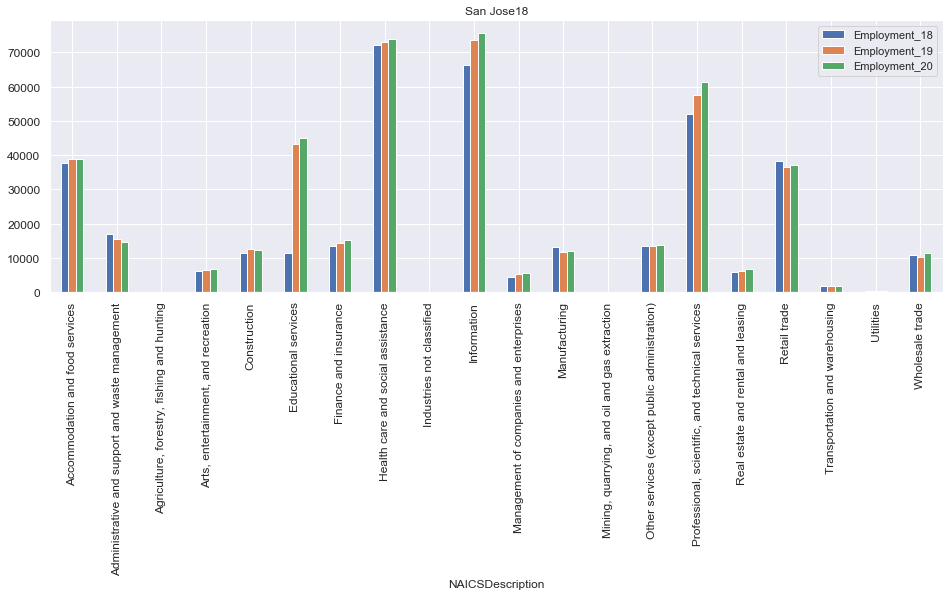

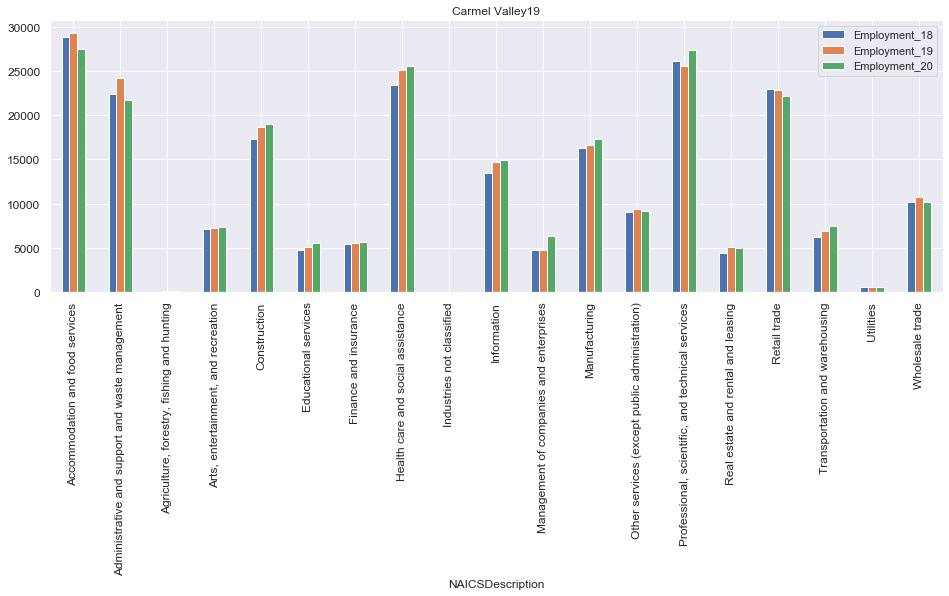

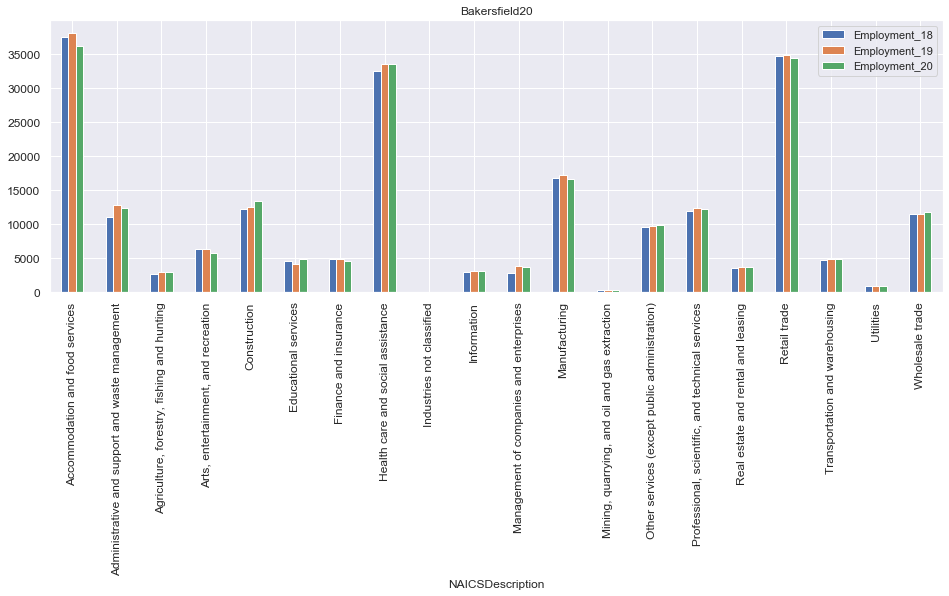

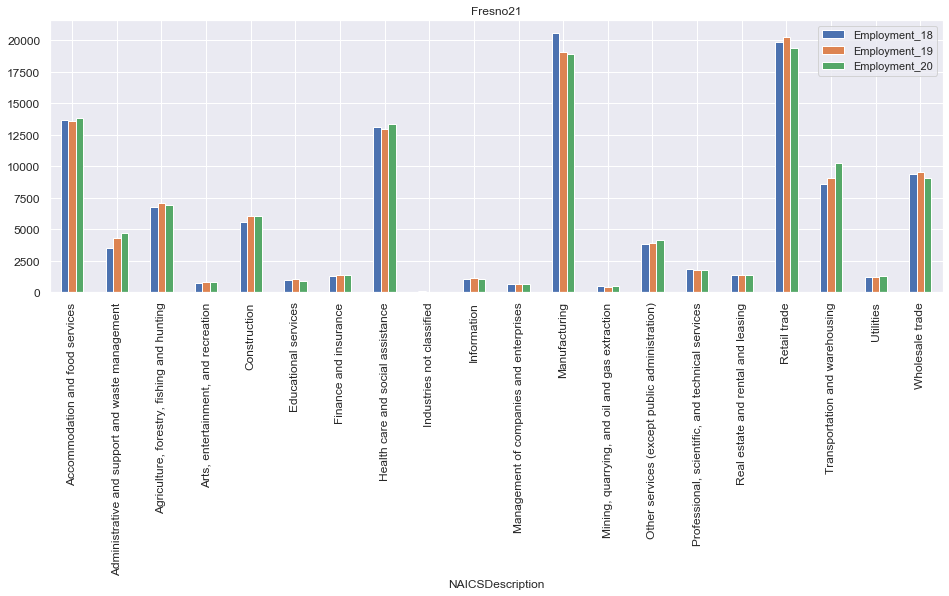

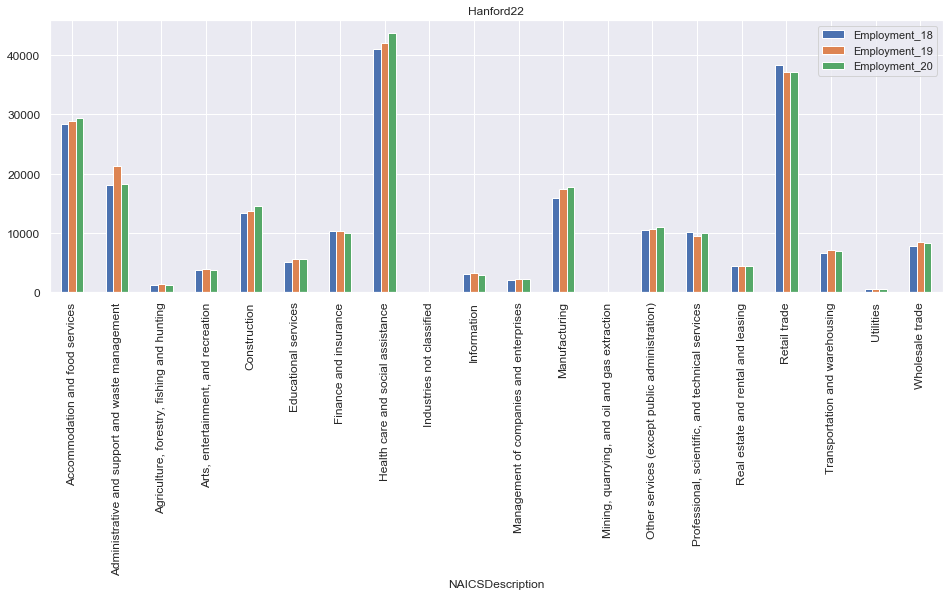

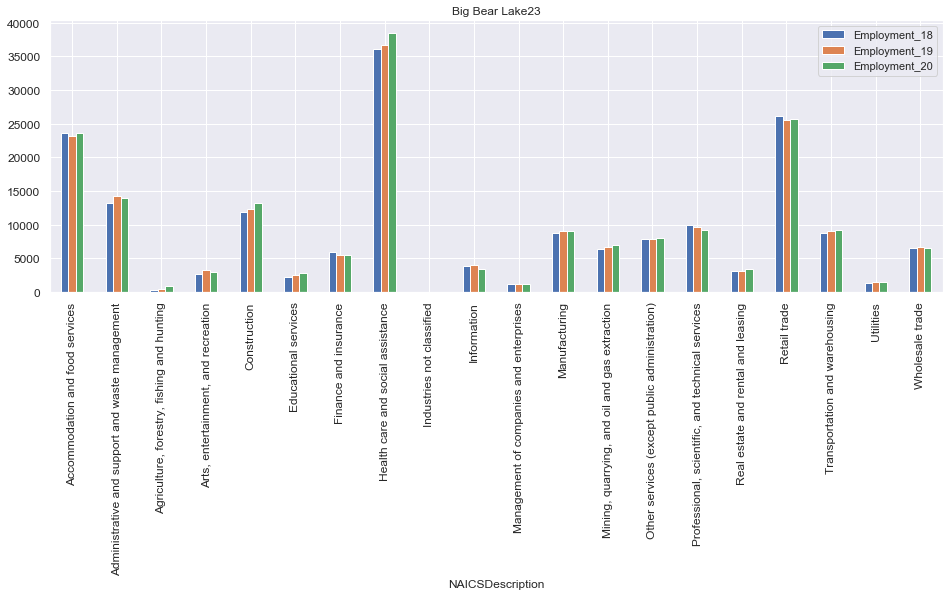

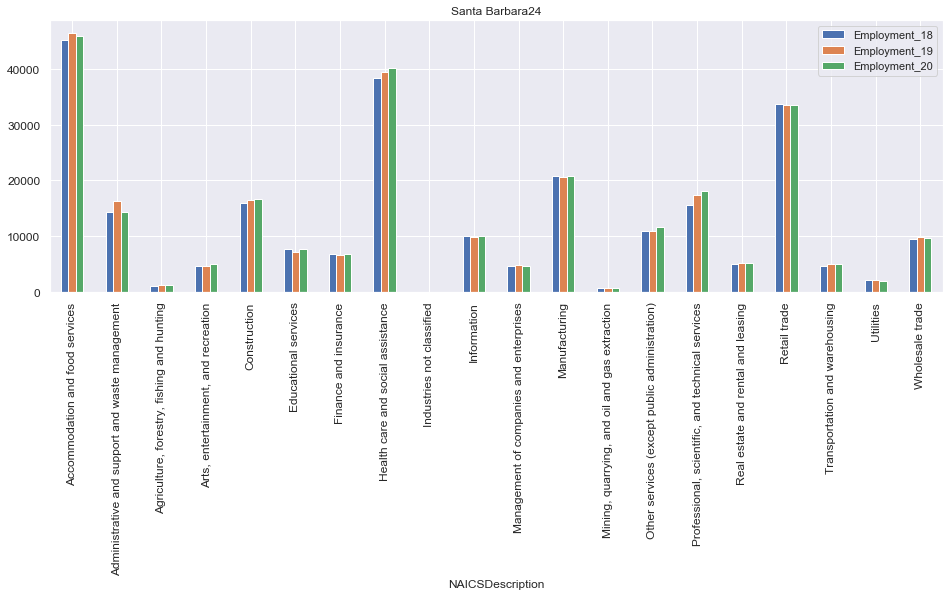

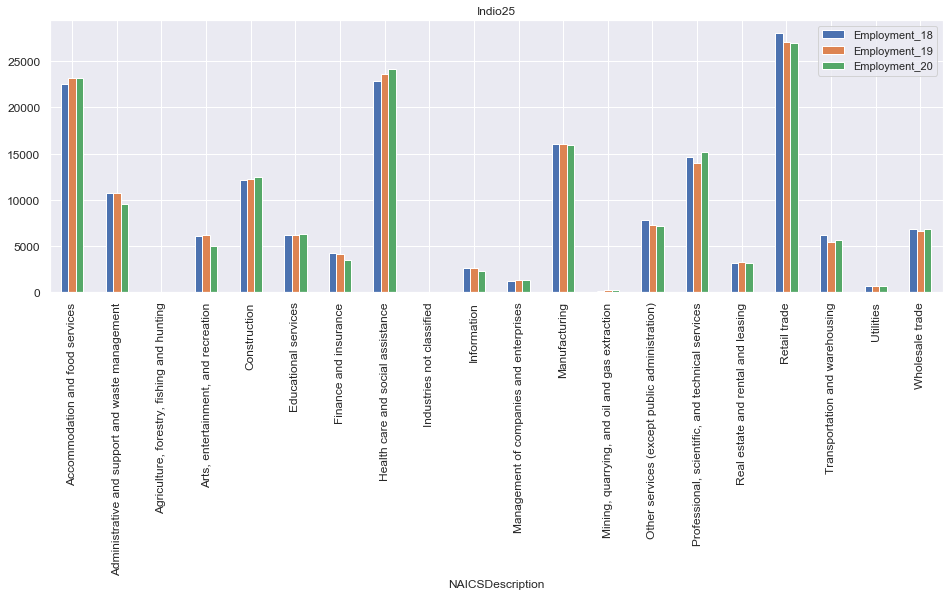

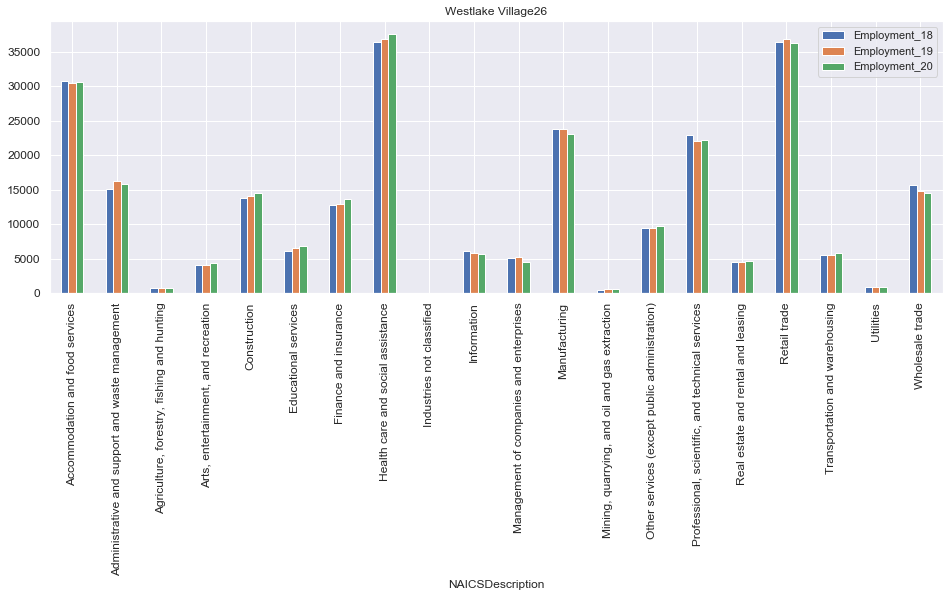

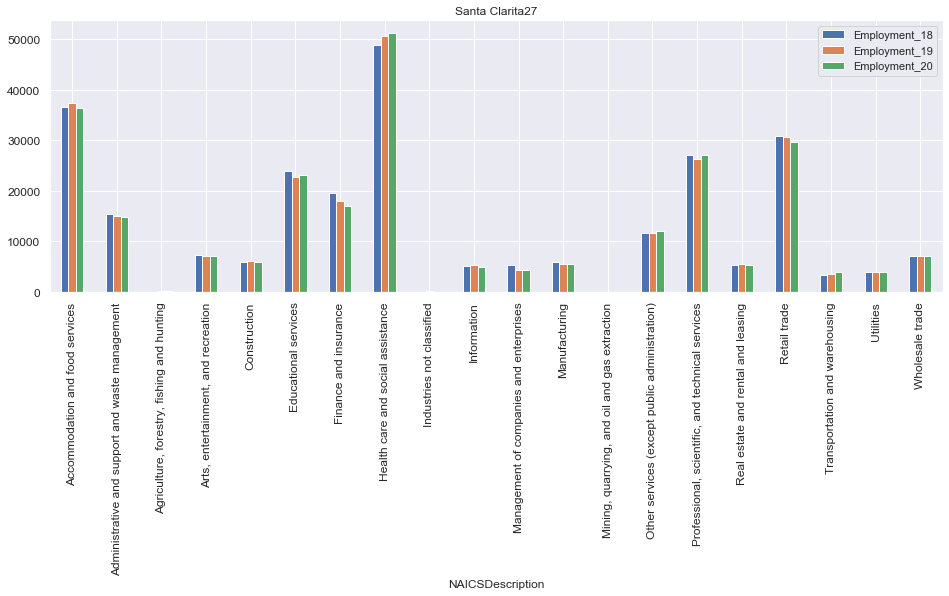

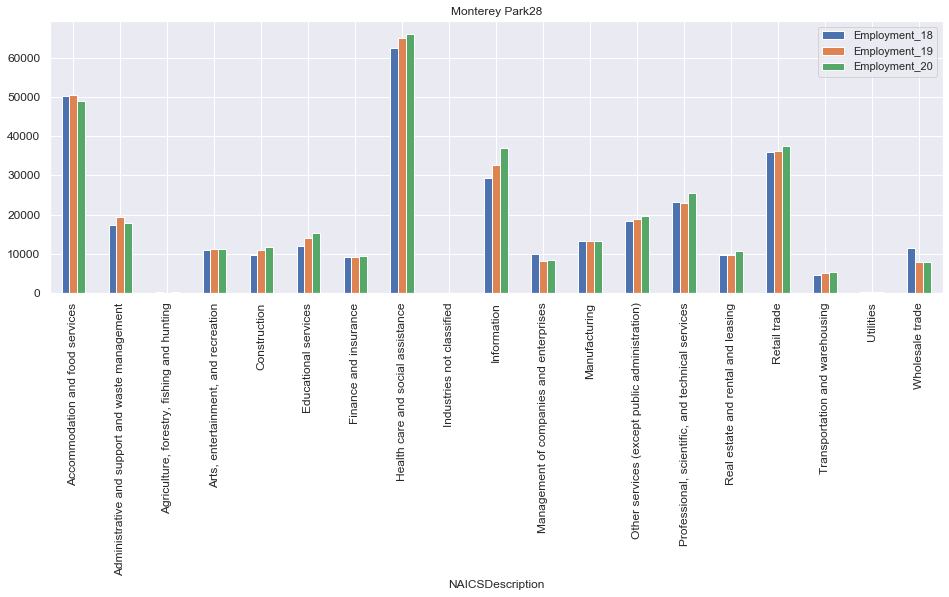

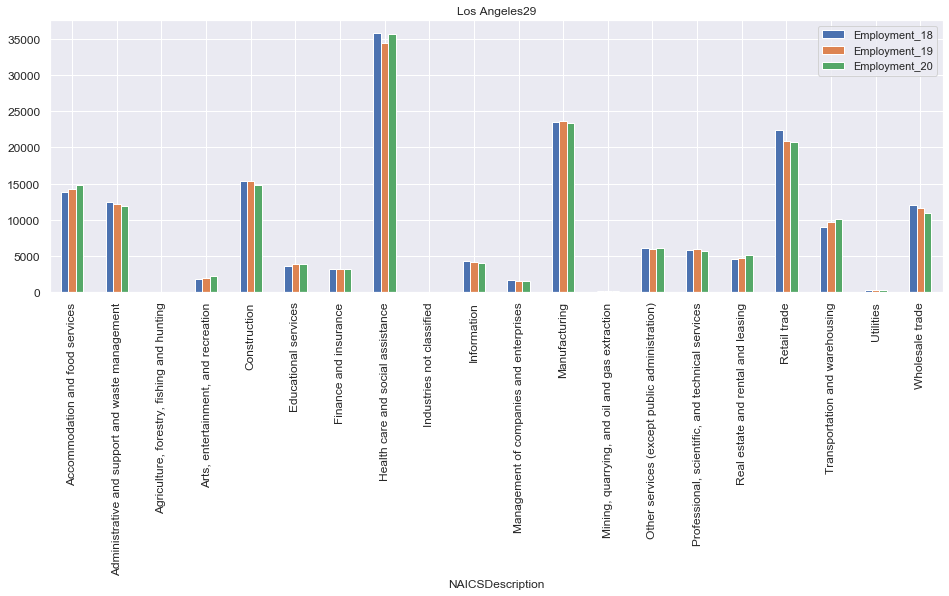

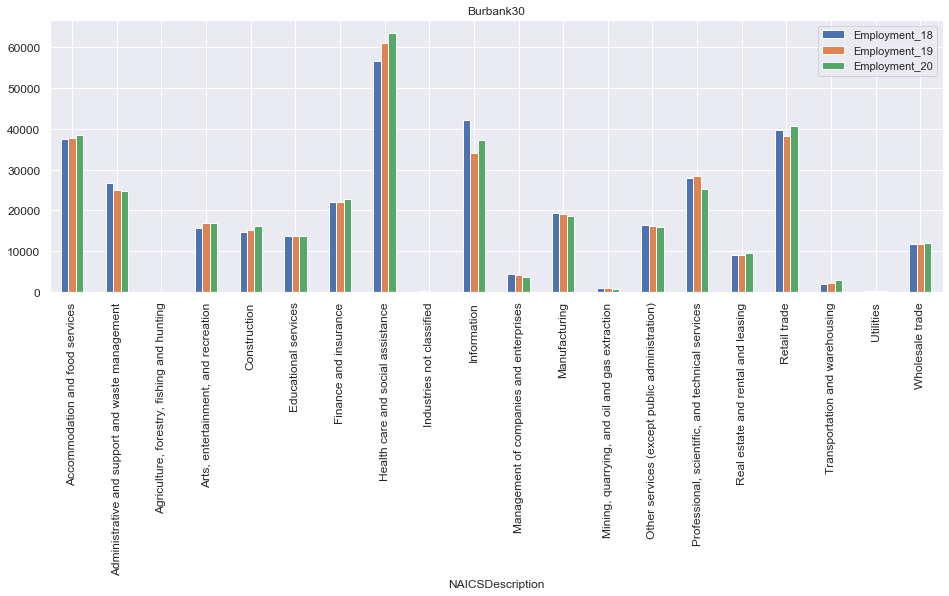

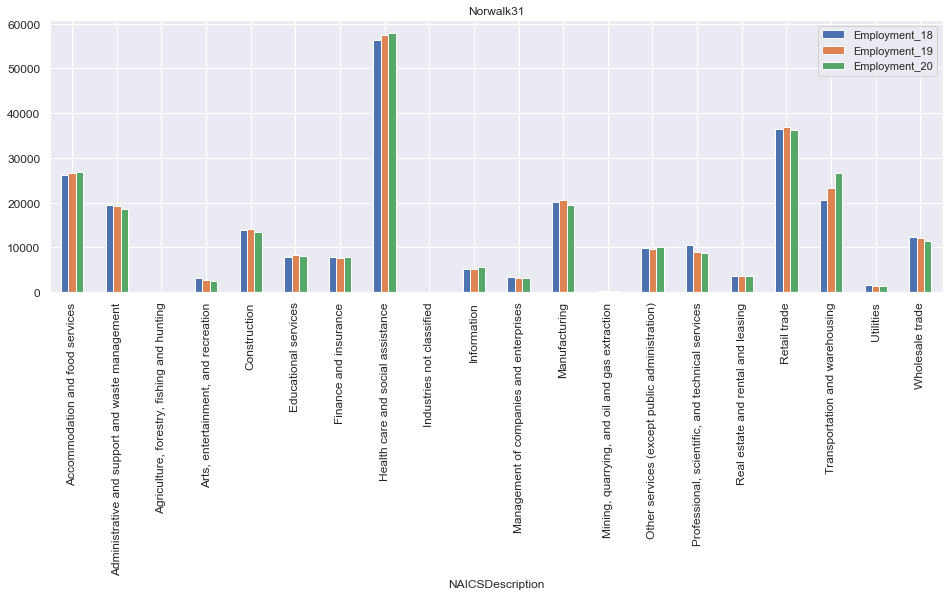

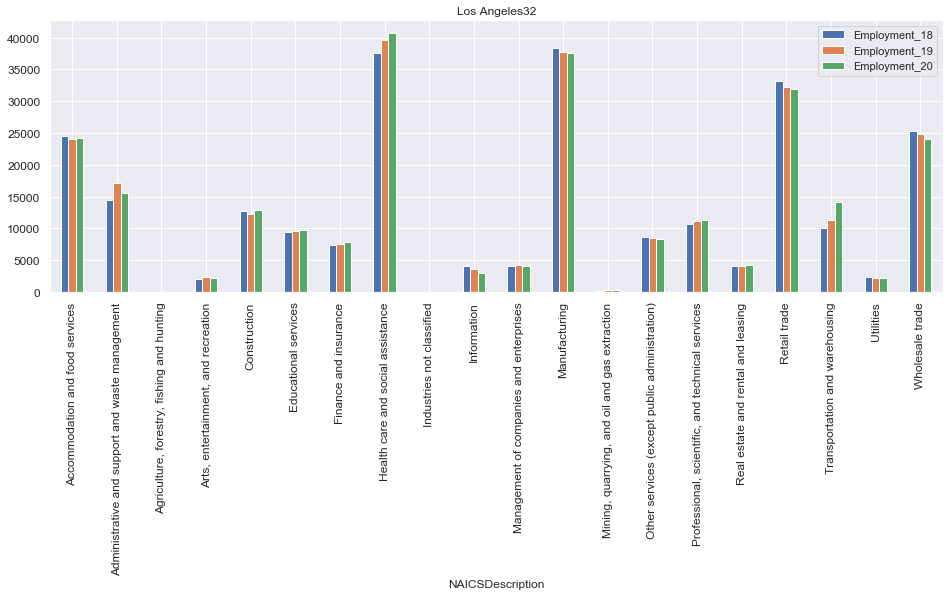

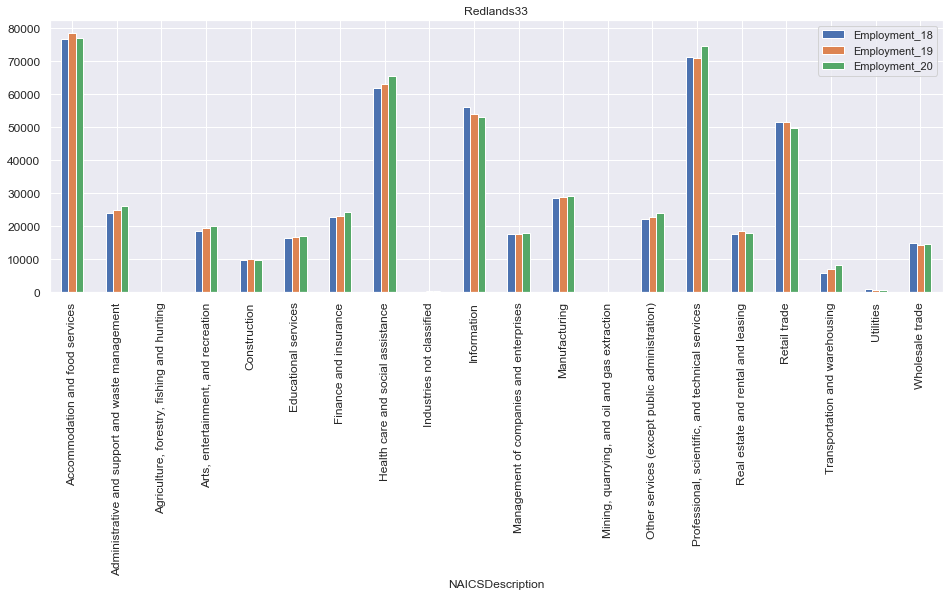

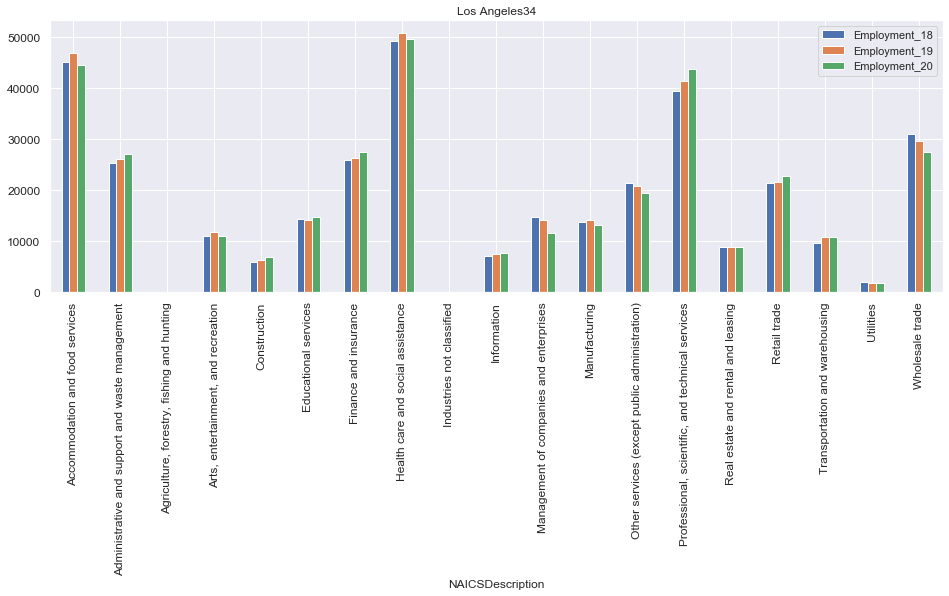

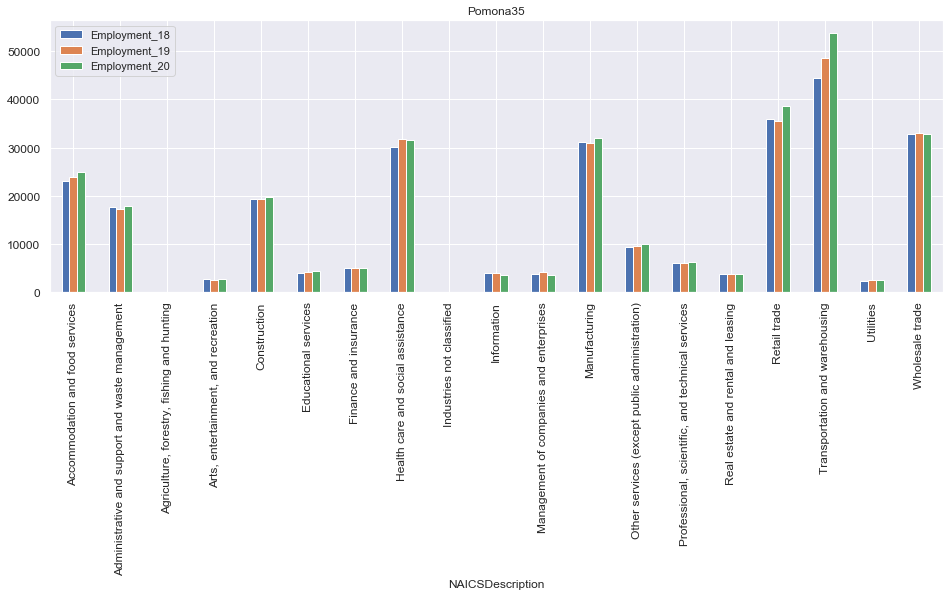

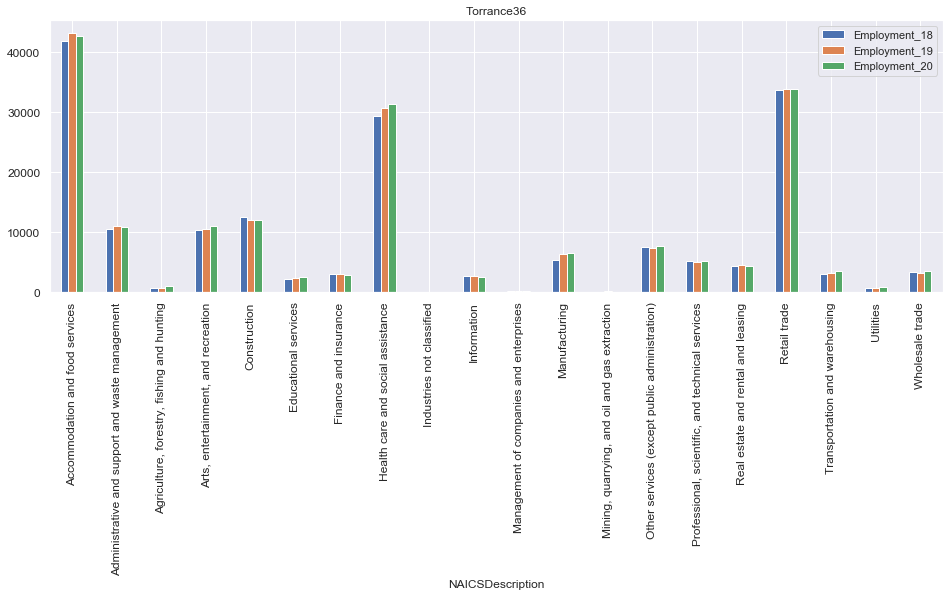

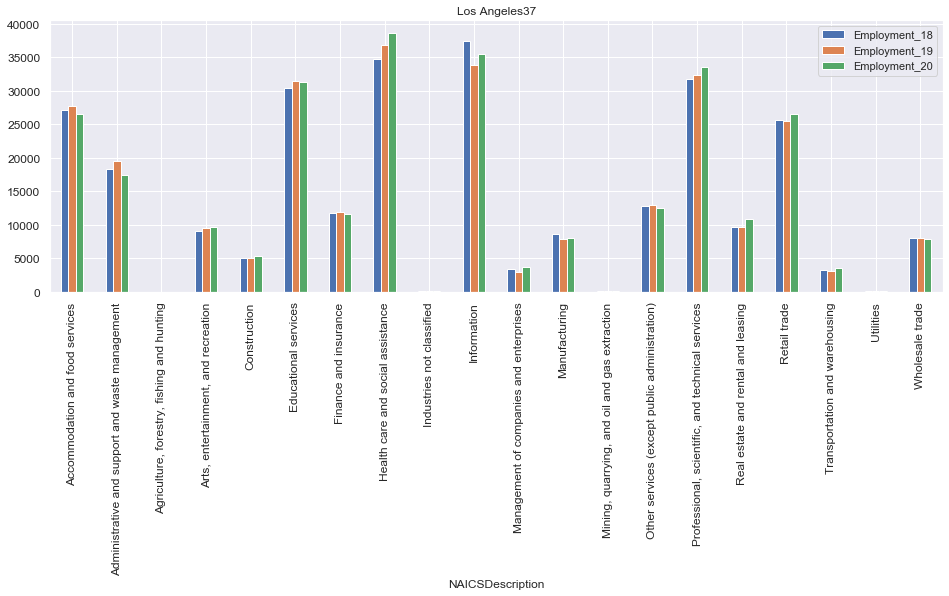

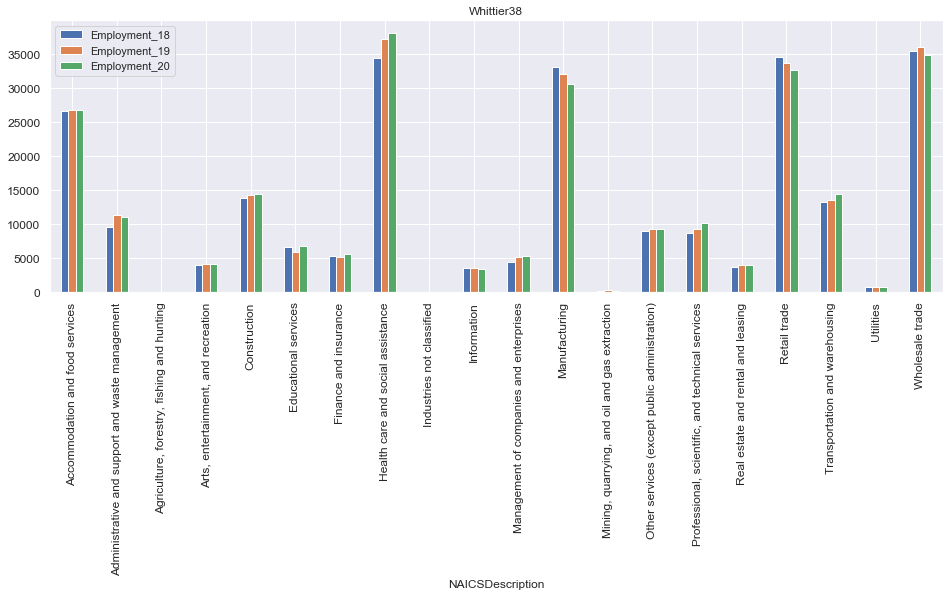

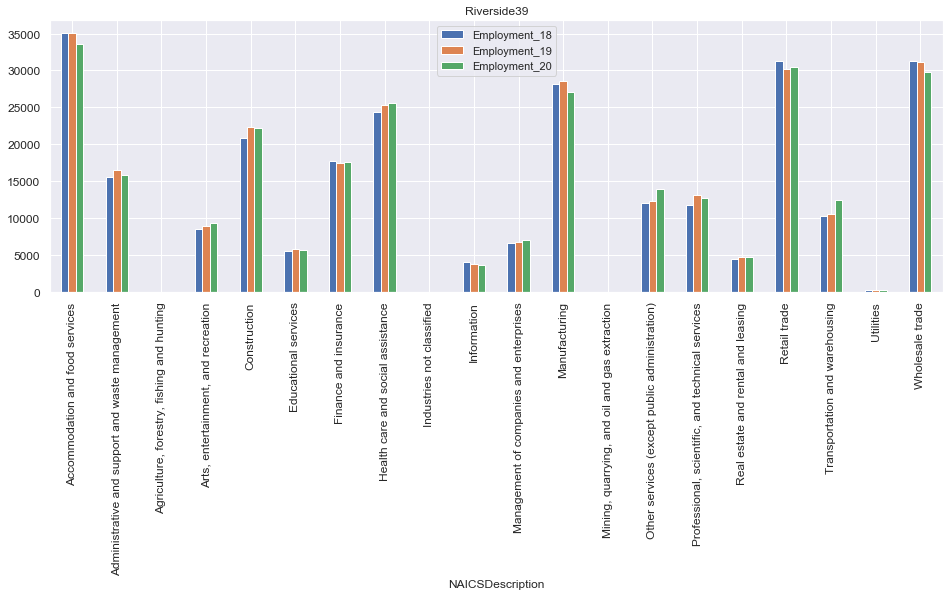

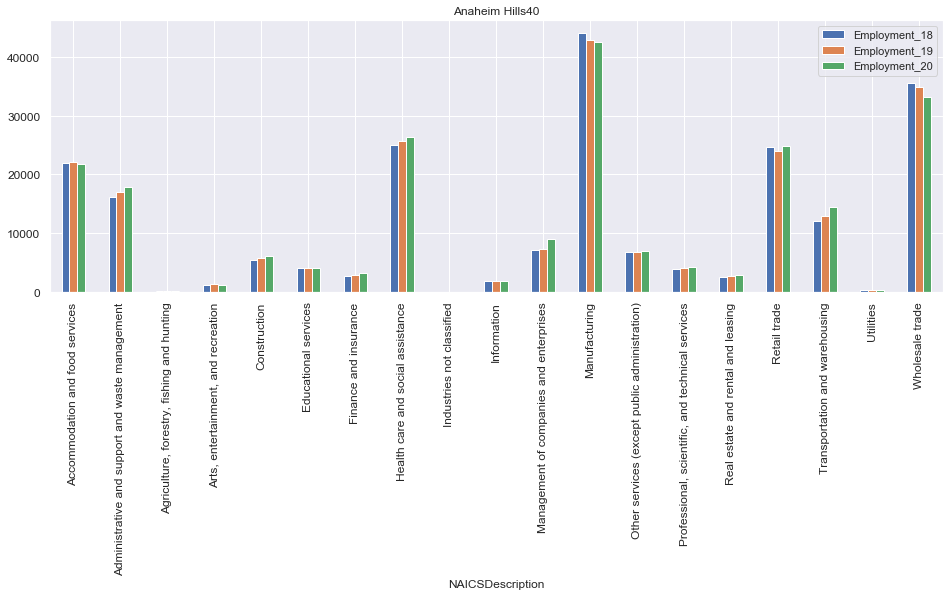

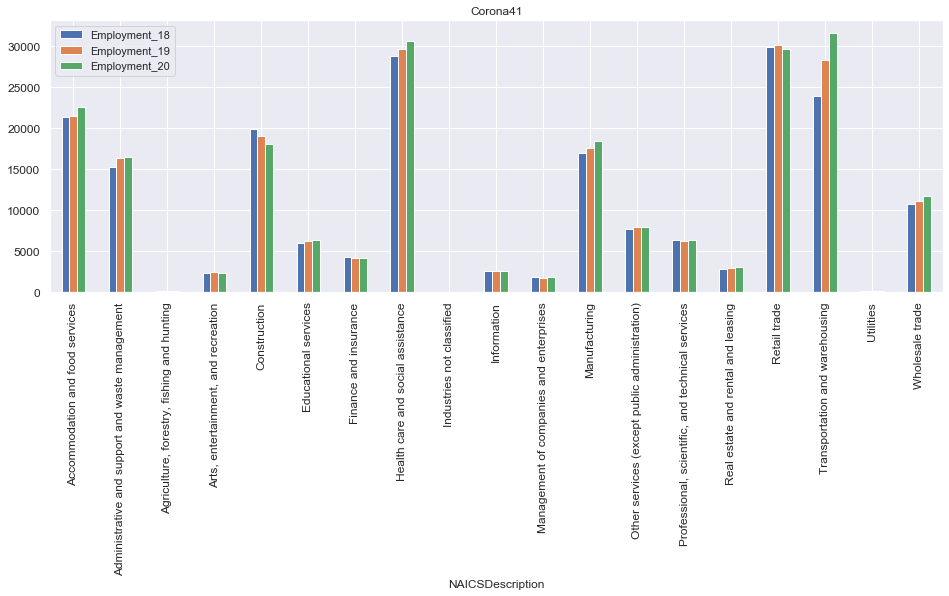

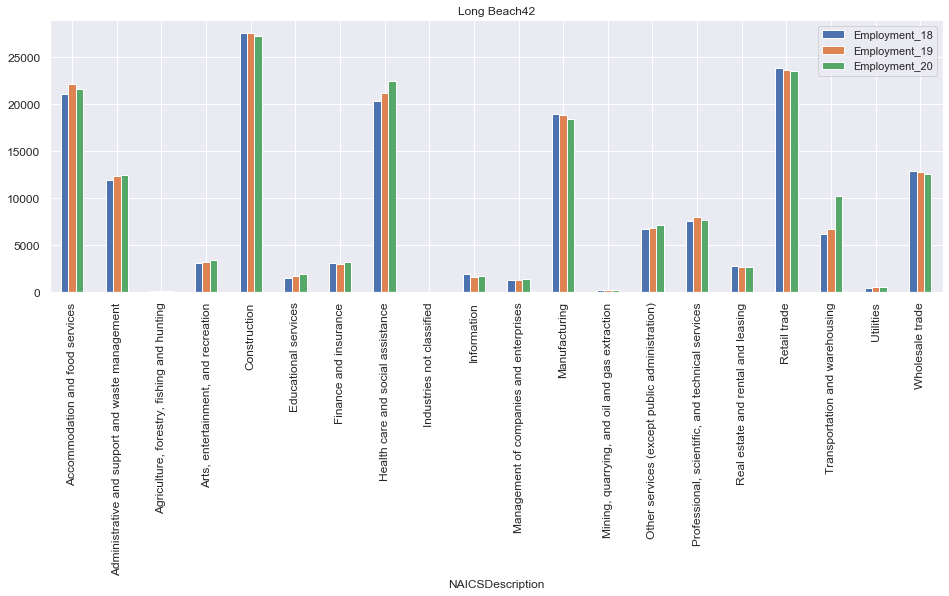

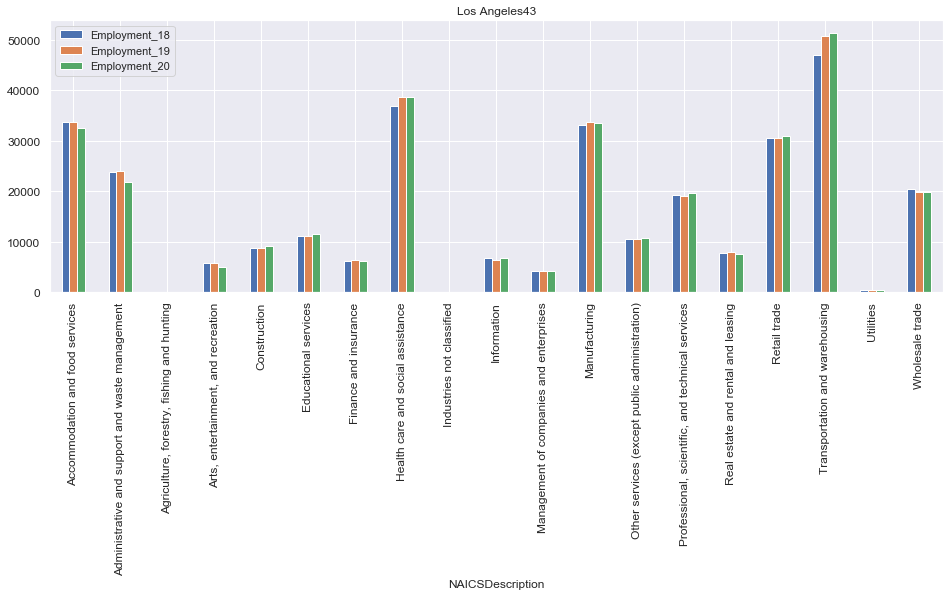

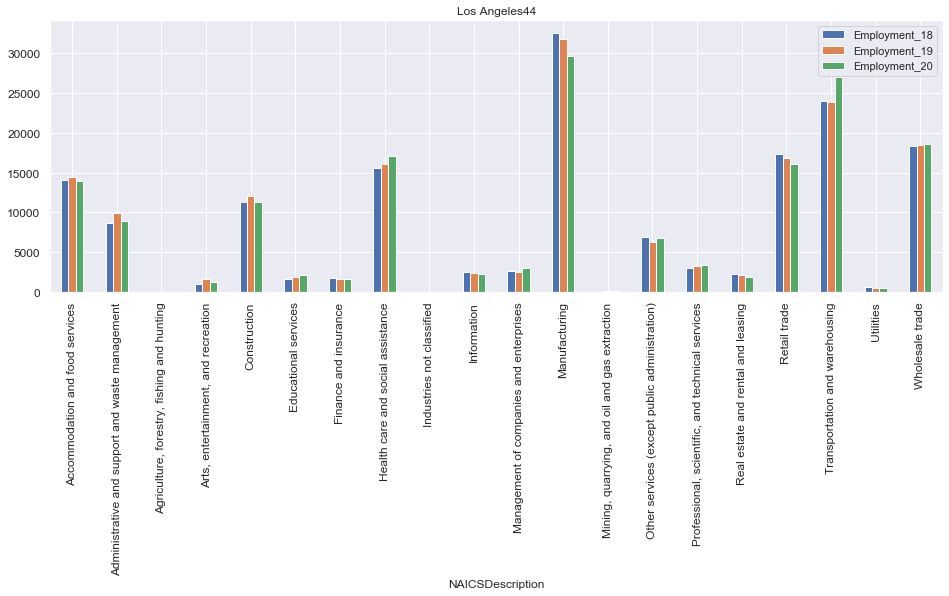

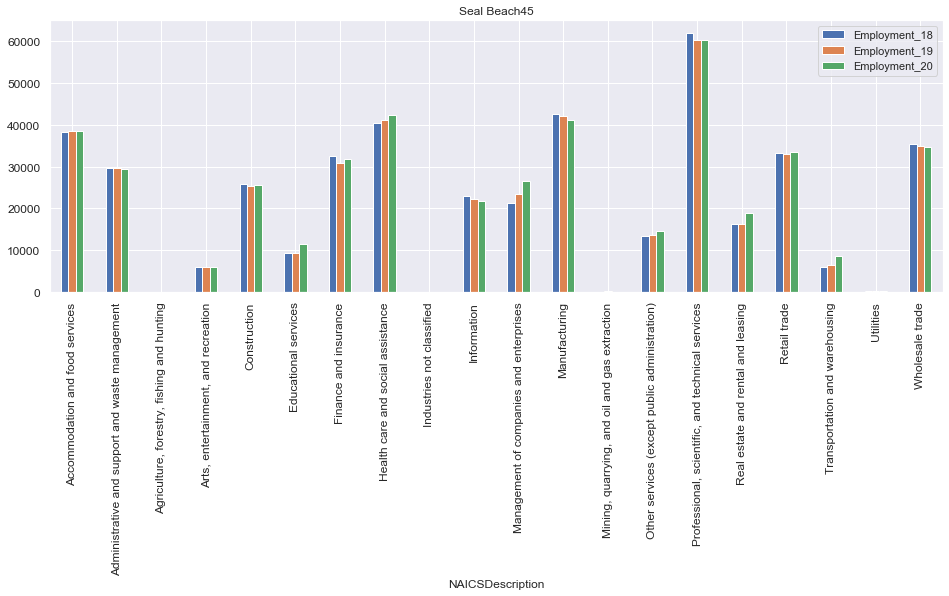

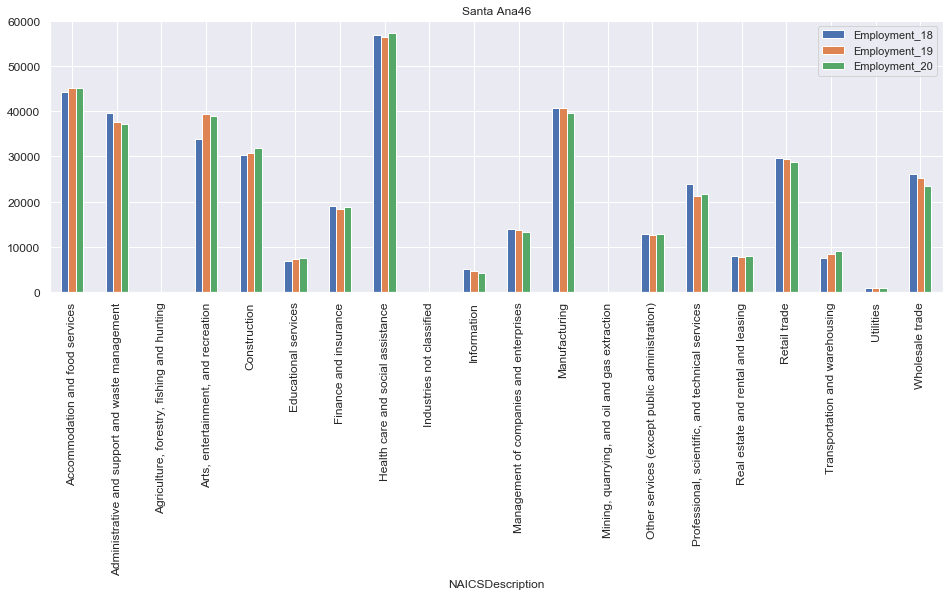

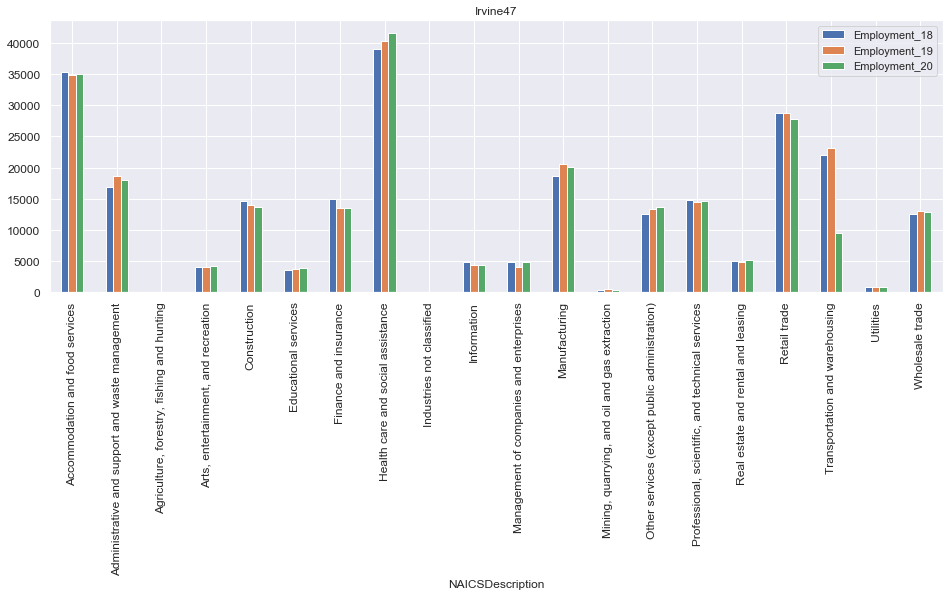

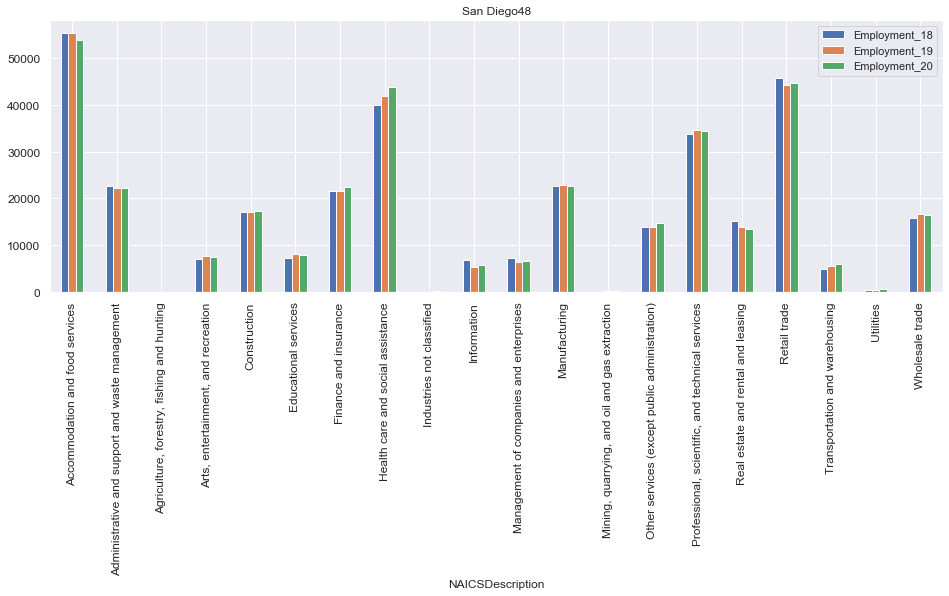

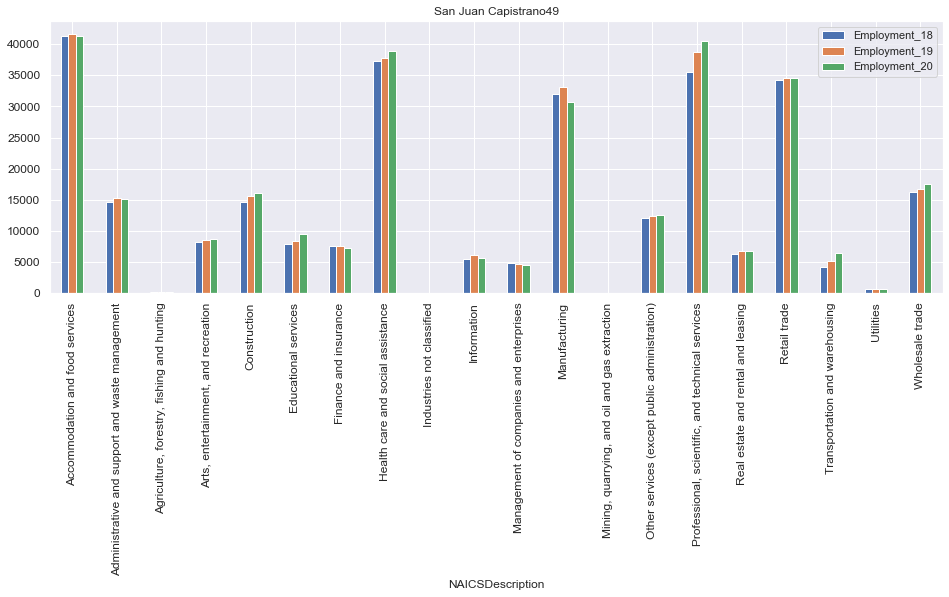

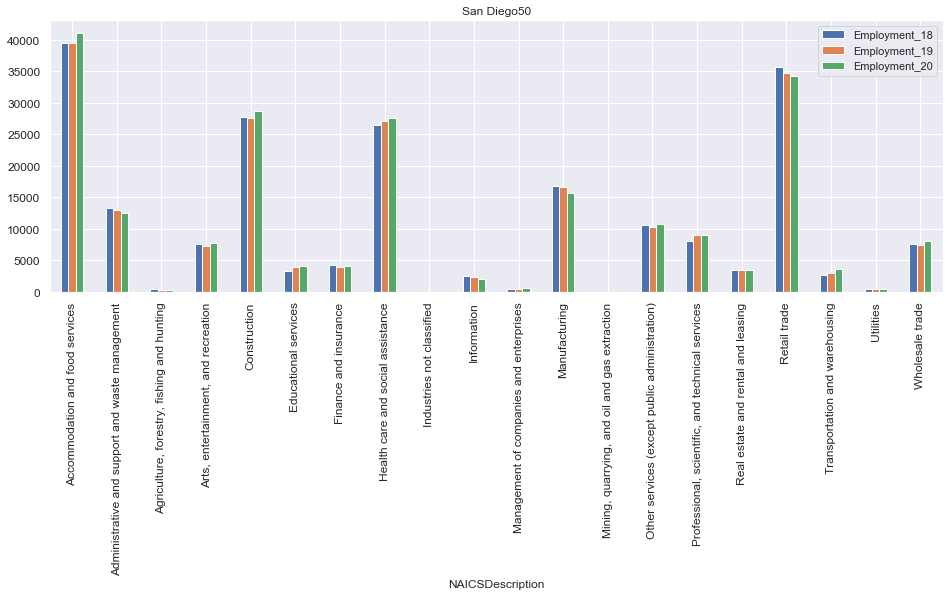

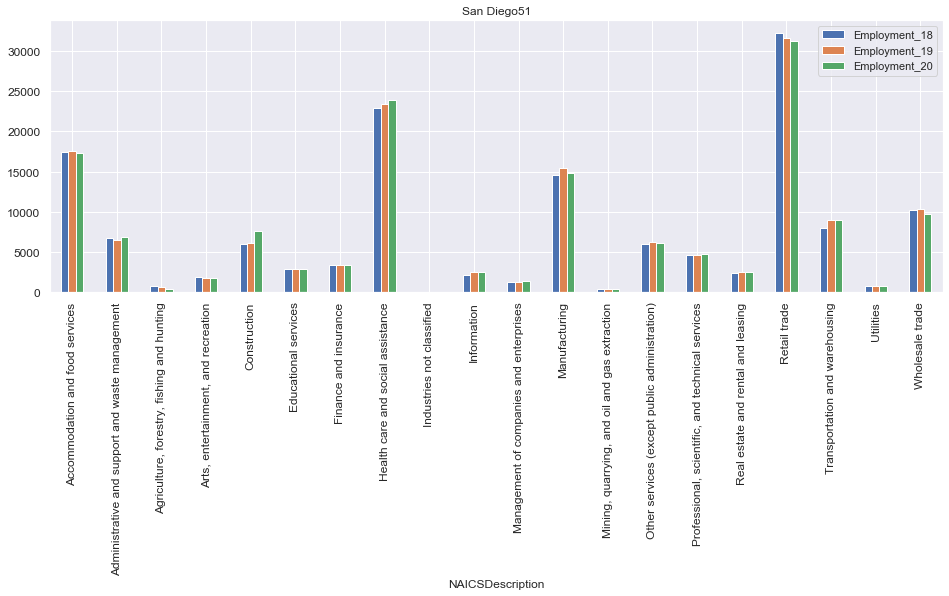

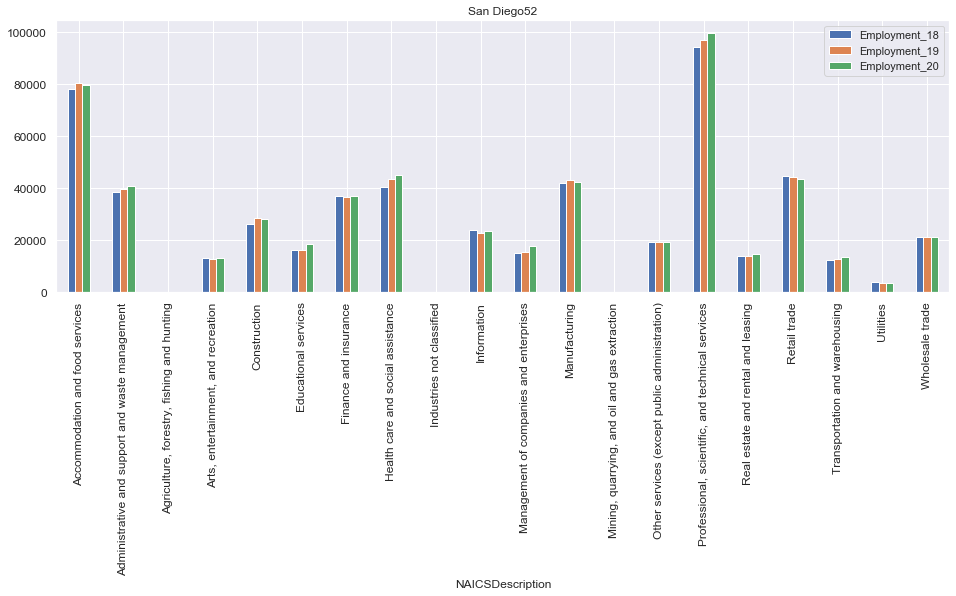

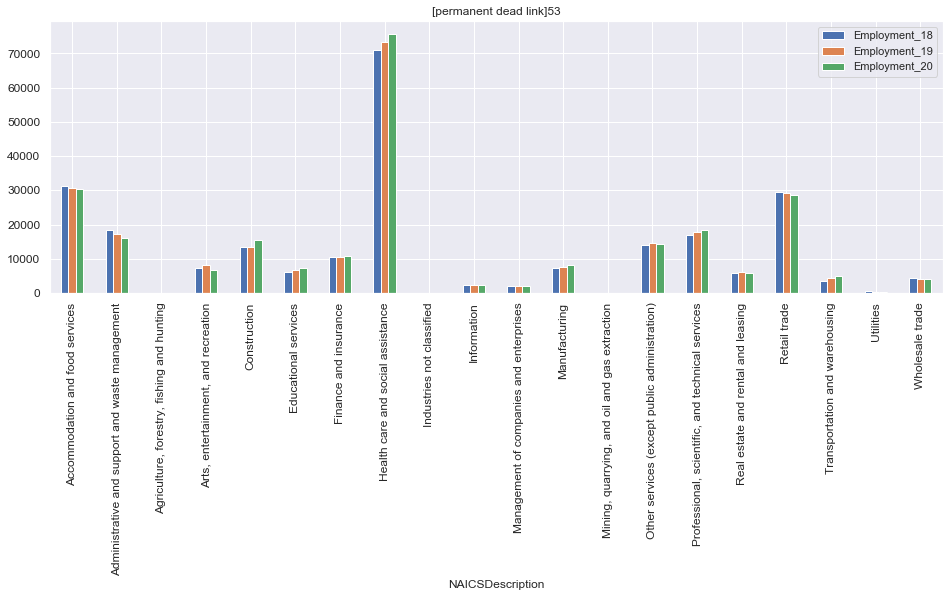

In [61]:
for i in list(df4['CongressionalDistrict116th'].unique()):
    (df4.loc[df4['CongressionalDistrict116th'] == i].plot('NAICSDescription',['Employment_18', 'Employment_19', 'Employment_20'],
                                        kind = 'bar', figsize = (16, 5),fontsize = 12, rot = 90, title = i))


#### Visualization of avarage salary per year per NAICSDescription & per congressional district

In [62]:
#for i in list(df4['CongressionalDistrict116th'].unique()):
#    (df4.loc[df4['CongressionalDistrict116th'] == i].plot('NAICSDescription',['AverageSalary_18', 'AverageSalary_19', 'AverageSalary_20'],
#                                        kind = 'bar', figsize = (16, 5),fontsize = 12, rot = 90, title = i))


#### Visualization of number of establishment per year per NAICS Description & per congressional district


In [63]:
#for i in list(df4['CongressionalDistrict116th'].unique()):
#    (df4.loc[df4['CongressionalDistrict116th'] == i].plot('NAICSDescription',['NumberofEstablishments_18', 'NumberofEstablishments_19',
#                                                                               'NumberofEstablishments_20'],
#                                        kind = 'bar', figsize = (16, 5),fontsize = 12, rot = 90, title = i))


#### stastics of dataset df4

In [64]:
(df4.describe()).round()

NumberofEstablishments_18  Employment_18  AverageSalary_18  \
count                     1050.0         1050.0            1050.0   
mean                       908.0        13727.0           62997.0   
std                        967.0        15248.0           39422.0   
min                          0.0            0.0               0.0   
25%                        141.0         2767.0           35477.0   
50%                        636.0         8411.0           53880.0   
75%                       1425.0        20440.0           77213.0   
max                       7965.0       113108.0          348970.0   

       NumberofEstablishments_19  Employment_19  AverageSalary_19  \
count                     1050.0         1050.0            1050.0   
mean                       919.0        13941.0           65563.0   
std                        980.0        15576.0           41241.0   
min                          0.0            0.0               0.0   
25%                        139.0         2832.0           36926.0   
50%                        649.0         8439.0           55246.0   
75%                       1438.0        20735.0           78884.0   
max                       8158.0       121245.0          332870.0   

       NumberofEstablishments_20  Employment_20  AverageSalary_20  
count                     1050.0         1050.0            1050.0  
mean                       933.0        14106.0           65887.0  
std                        998.0        15855.0           44679.0  
min                          0.0            0.0               0.0  
25%                        143.0         2868.0           36318.0  
50%                        666.0         8856.0           55382.0  
75%                       1441.0        20458.0           79024.0  
max                       8661.0       133548.0          358721.0

In [65]:
df4['NumberofEstablishments_18'].median()

636.0

In [66]:
# finds inter quantile range
iqr = df4['NumberofEstablishments_18'].quantile(0.75) - df4['NumberofEstablishments_18'].quantile(0.25)
iqr

1283.5

In [67]:
upper_outliers = df4['NumberofEstablishments_18'].quantile(0.75) + iqr * 1.5
upper_outliers

3350.0

In [68]:
#df4.loc[df4['NumberofEstablishments_18'] > upper_outliers].sort_values(by = 'NumberofEstablishments_18', ascending = False)

In [69]:
(df4.loc[df4['NumberofEstablishments_18'] > upper_outliers].sort_values(by = 'NumberofEstablishments_18', ascending = False).NAICSDescription
 .value_counts())

Professional, scientific, and technical services    13
Health care and social assistance                    5
Arts, entertainment, and recreation                  2
Retail trade                                         1
Accommodation and food services                      1
Real estate and rental and leasing                   1
Wholesale trade                                      1
Name: NAICSDescription, dtype: int64

In [70]:
df4.corr()

NumberofEstablishments_18  Employment_18  \
NumberofEstablishments_18                   1.000000       0.772469   
Employment_18                               0.772469       1.000000   
AverageSalary_18                            0.013352       0.099156   
NumberofEstablishments_19                   0.999553       0.767576   
Employment_19                               0.769925       0.993957   
AverageSalary_19                            0.013063       0.086966   
NumberofEstablishments_20                   0.998044       0.756834   
Employment_20                               0.768587       0.990667   
AverageSalary_20                            0.010365       0.097266   

                           AverageSalary_18  NumberofEstablishments_19  \
NumberofEstablishments_18          0.013352                   0.999553   
Employment_18                      0.099156                   0.767576   
AverageSalary_18                   1.000000                   0.013870   
NumberofEstablishments_19          0.013870                   1.000000   
Employment_19                      0.103388                   0.765479   
AverageSalary_19                   0.943249                   0.013746   
NumberofEstablishments_20          0.016579                   0.999162   
Employment_20                      0.118542                   0.764636   
AverageSalary_20                   0.951369                   0.010324   

                           Employment_19  AverageSalary_19  \
NumberofEstablishments_18       0.769925          0.013063   
Employment_18                   0.993957          0.086966   
AverageSalary_18                0.103388          0.943249   
NumberofEstablishments_19       0.765479          0.013746   
Employment_19                   1.000000          0.092433   
AverageSalary_19                0.092433          1.000000   
NumberofEstablishments_20       0.755118          0.016644   
Employment_20                   0.997652          0.107400   
AverageSalary_20                0.102946          0.933214   

                           NumberofEstablishments_20  Employment_20  \
NumberofEstablishments_18                   0.998044       0.768587   
Employment_18                               0.756834       0.990667   
AverageSalary_18                            0.016579       0.118542   
NumberofEstablishments_19                   0.999162       0.764636   
Employment_19                               0.755118       0.997652   
AverageSalary_19                            0.016644       0.107400   
NumberofEstablishments_20                   1.000000       0.755228   
Employment_20                               0.755228       1.000000   
AverageSalary_20                            0.012923       0.118614   

                           AverageSalary_20  
NumberofEstablishments_18          0.010365  
Employment_18                      0.097266  
AverageSalary_18                   0.951369  
NumberofEstablishments_19          0.010324  
Employment_19                      0.102946  
AverageSalary_19                   0.933214  
NumberofEstablishments_20          0.012923  
Employment_20                      0.118614  
AverageSalary_20                   1.000000

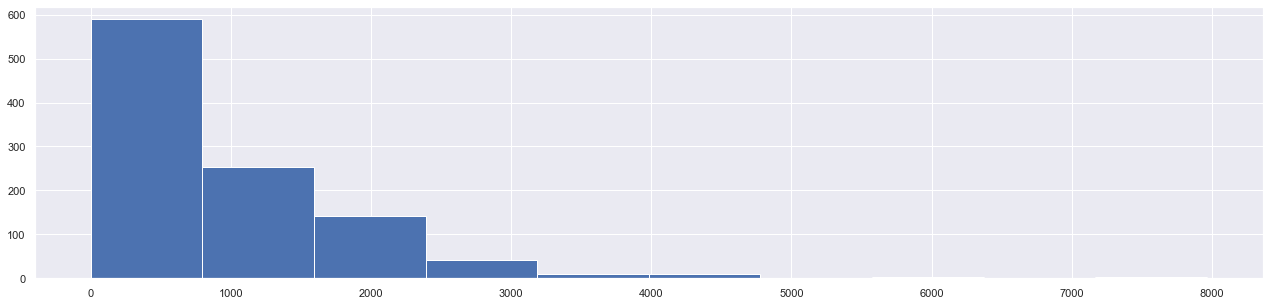

In [71]:
# right skewed distribution of data points. Mean would be greater than median
df4.NumberofEstablishments_18.hist()